# 예측을 위한 탐색적 데이터 분석 (죽음의 타이타닉호)


### *Sometimes life has a cruel sense of humor, giving you the thing you always wanted at the worst time possible.*
                                                                                       -Lisa Kleypas

                                                                                                                                     

멋진 말입니다.

"때때로 인생은 잔인한 유머감각이 있어, 가능하다면 최악의 순간에도 여러분이 얻고자 하는것을 줍니다." 

On the verge of COVID-19 pandemic, keep your chin up!!

타이타닉호 침몰은 해양 재난 역사상 가장 엄청난 재앙중의 하나입니다. 1912년 4월 15일, 첫 출항한 타이타닉호는 빙산과 충돌 후 2224명의 승객과 승무원 중에 1502명이 사망하여, 말 그대로 "죽음의 타이타닉호" 라고 불립니다. 
90년대 말에서 2000년대 초반, 우리에게 레오나르도 디카프리오로 잘 알려진 영화 타이타닉이 이 해양 재난을 테마로 한 영화이기도 합니다.

배 건조에만 7천5백만달러가 들었고, 충돌로 인한 침몰로 바닷속으로 가라앉았고, 현재도 대서양 4000미터 바다속에 가라앉아 있습니다.
사고원인은 표면적으로 빙산과의 충돌로 알려져있지만 , 최근의 연구에 의하면 불량자재를 사용한 것으로 결과가 발표된 자료도 있음을 아셨으면 합니다. 

[관련 기사](https://news.joins.com/article/3112549)

2014년 4월16일 우리나라 진도해역에서 침몰한 세월호( Sinking of MV Sewol)의 재난사고가 대충주의와 인재였다는 사실은 다 아실겁니다. 

이 커널의 목적은 단순합니다. 생존자 예측 모델을 생성하는 절차 및 이에 필요한 피처를 추가 및 확인하는 방법을 익히는데 있습니다.

## 분석 절차 :

#### Part1: 탐색적 데이터 분석(EDA):
1)피처 분석

2)다중 피처를 고려하기 위한 추세 및 연관관계 파악
#### Part2: 피처 엔지니어링 및 데이터 정제:
1)신규 피처의 추가 

2)중복 피처 제거

3)문자형 피처의 변환
#### Part3: 예측 모델링
1)ML기본 모델 익히기

2)교차검증(Cross Validation)

3)앙상블 기법(Ensemble)

4)중요 피처 추출(Feature Extraction)

## Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")
sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# 컬럼맵
cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [3]:
def dataset_info():
    """
    데이터셋 로드
    널 데이터 확인    
    """
    path = "../input/titanic/"
    data = pd.read_csv(path+"train.csv")
    
    print("Descriptive Statistics : \n")
    display(data.info())
    print("\n")
    display(data.head(n=3))    
    
    print("Null Data confirmation : \n")
    display(data.isnull().sum())  # 널 데이터 확인
    return data

df_train = dataset_info()

Descriptive Statistics : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Null Data confirmation : 



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Age피처는 177개의 널값을 가지며, Cabin은 687개의 널값 그리고 Embarked피처는 2개의 피처가 널값을 가짐.
* Age, Cabin 피처는 널값이 있으며 피처 엔지니어링 단계에서 널값을 대체할수 있도록 모색

### How many Survived??

* Read Evaludate Print Loop

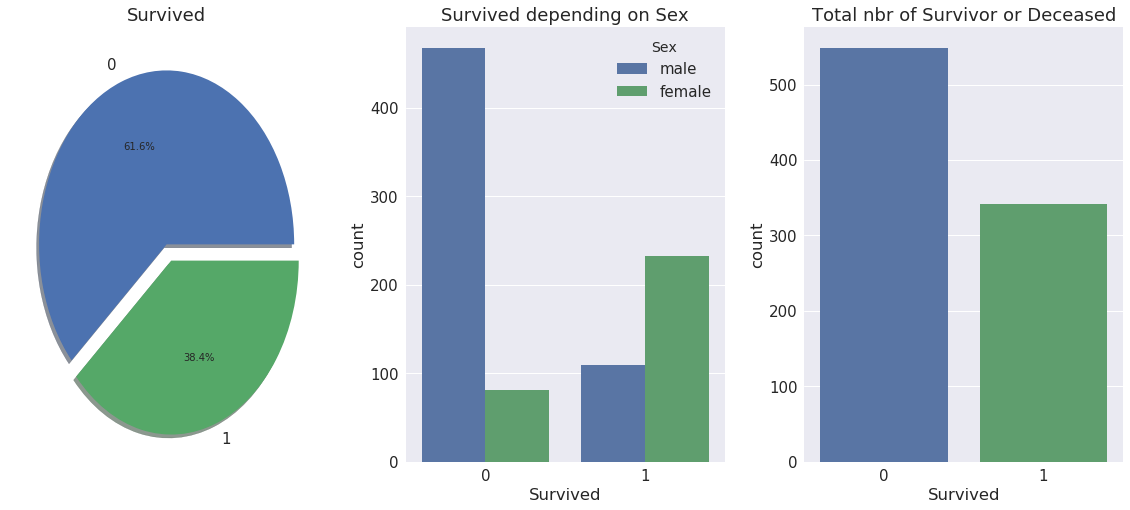

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
survivor_cnt = df_train["Survived"].value_counts()

survivor_cnt.plot.pie(explode = [0, 0.1], autopct= '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Survived")
ax[0].set_ylabel("")

sns.countplot(x="Survived", data = df_train, hue="Sex", ax = ax[1])
ax[1].set_title("Survived depending on Sex")

sns.countplot(x="Survived", data = df_train, ax=ax[2])
ax[2].set_title("Total nbr of Survivor or Deceased")

plt.subplots_adjust(hspace=0.5, wspace=0.25)
plt.show()

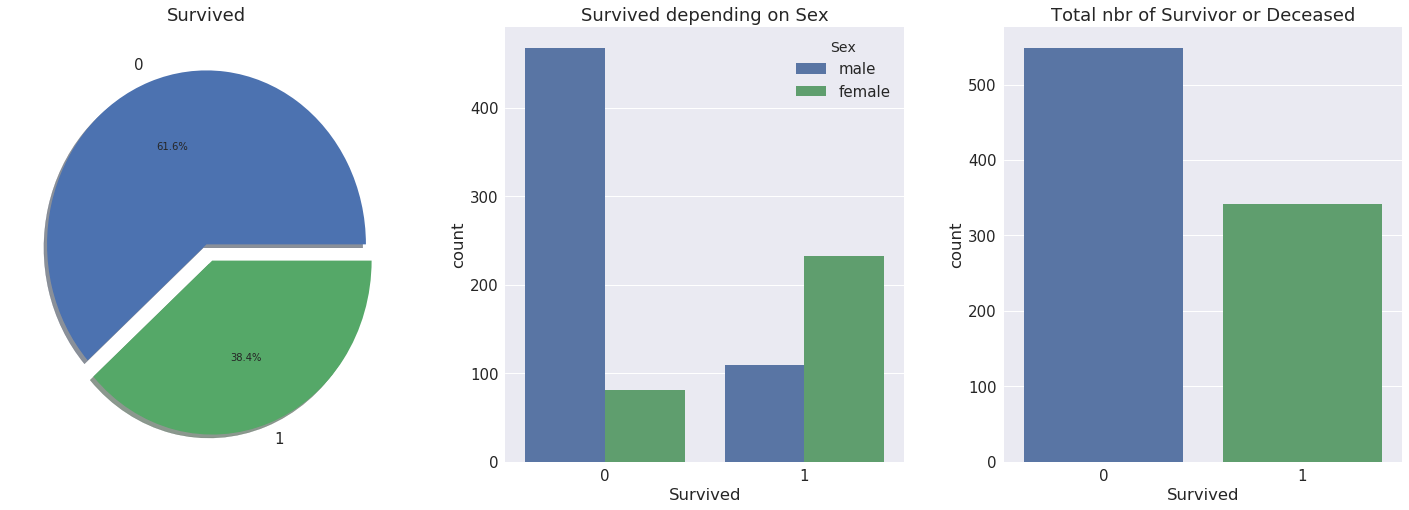

In [5]:
def visualize_survivor(df_train):
    """
    생존자 확인
    1)bar chart
    2)countplot
    두개의 방법으로 시각화
    """
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))
    survivor_cnt = df_train['Survived'].value_counts()
    
    survivor_cnt.plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title("Survived")
    ax[0].set_ylabel('')
    
    sns.countplot(x="Survived", data = df_train, hue="Sex", ax = ax[1])
    ax[1].set_title("Survived depending on Sex")
    
    sns.countplot(x="Survived", data = df_train, ax=ax[2])
    ax[2].set_title("Total nbr of Survivor or Deceased")
    
    plt.subplots_adjust(hspace=0.5, wspace=0.25)
    plt.show()

# 수행
visualize_survivor(df_train)

38.4퍼센트의 승선한 인원만 살아남았으며,생존률 예측에 영향을 주는 피처를 추가적으로 파보겠습니다. 
* Age, Sex , Embarked(승선한 항구) , Pclass(객실등급)

## 피처 유형

### 범주형 피처:
범주형 피처는 피처의 값들이 구분될 수 있는 값들로 이루어진 피처들을 의미하며 다음과 같이 예를 들 수 있다.
예) Sex(남자 혹은 여자), 항구(Embarked)

### 순서가 있는 범주형 피처(Ordinal Features):
예) **Height** ( Tall, Medium, Short), **Pclass**

### 연속형 피처:
예) **Age**

## 피처 분석

## Sex--> 범주형 피처

In [6]:
# 남여의 생존자 
pd.DataFrame(df_train.groupby(['Sex','Survived'])['Survived'].count())

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

* Read Evaluate Print Loop

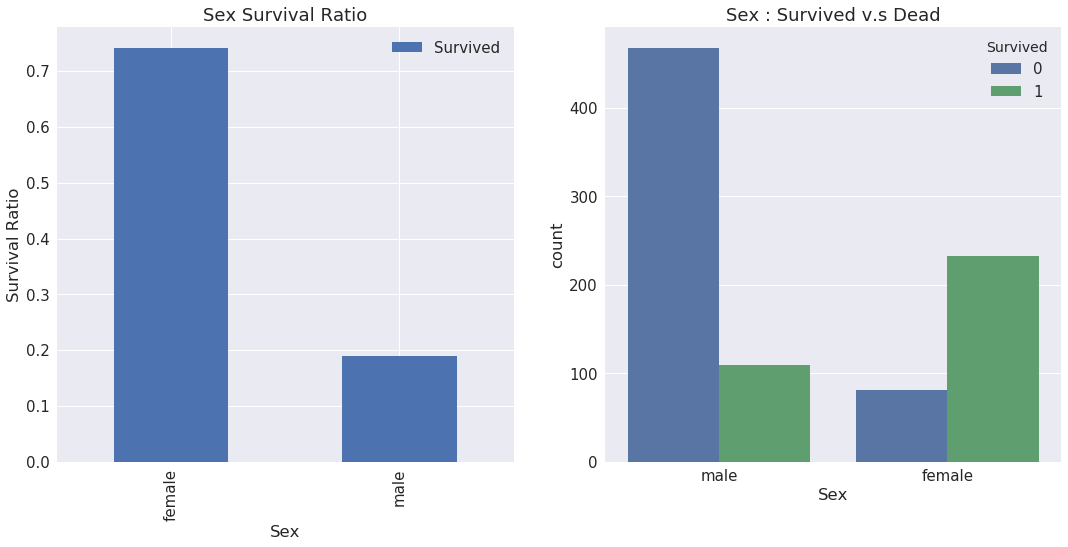

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

df_train[["Sex", "Survived"]].groupby("Sex").mean().plot.bar(ax= ax[0])
ax[0].set_title("Sex Survival Ratio")
ax[0].set_ylabel("Survival Ratio")

sns.countplot(x = "Sex", hue="Survived", data = df_train, ax = ax[1])
ax[1].set_title("{0} : {1} v.s Dead".format("Sex", "Survived"))
plt.show()

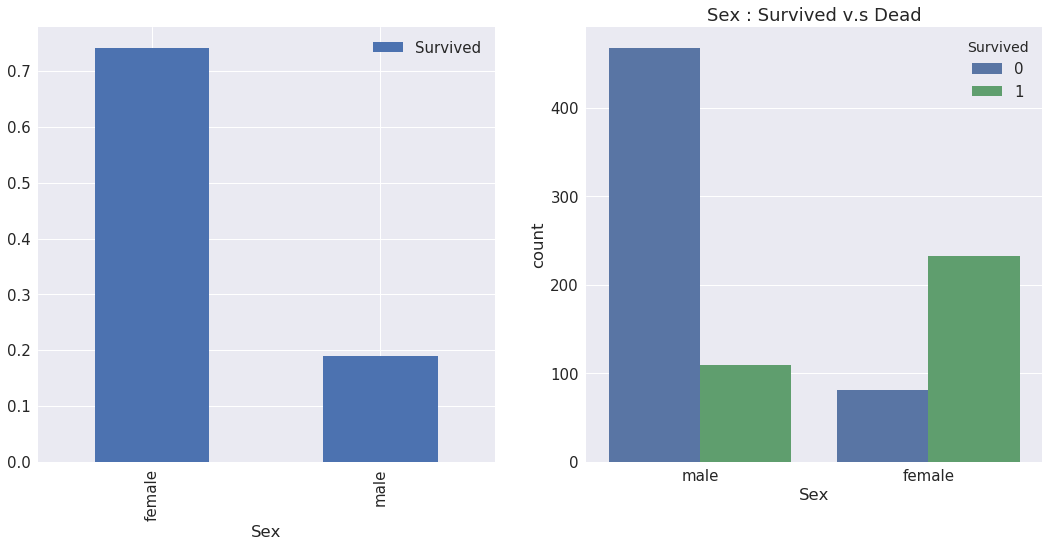

In [8]:
def visualize_survivor_ratio(tCols, gCols,df):
    """
    tCols - 보고자 하는 피처
    gCols - Groupby 피처
    df - 대상이 되는 데이터셋
    기능 : 바차트와 countplot차로 보여줌
    """
    fig, ax = plt.subplots(1, 2, figsize=(18, 8))
    df[tCols].groupby(gCols).mean().plot.bar(ax = ax[0])
    
    sns.countplot(x= tCols[0], hue=tCols[1], data = df, ax=ax[1])
    ax[1].set_title('{0} : {1} v.s Dead'.format(tCols[0], tCols[1]))
    plt.show()   

# 성별 생존자 수     
visualize_survivor_ratio(['Sex','Survived'], ['Sex'],df_train)    

75퍼센트 이상의 여성이 생존했고, 오직 18% ~ 19%의 남성만이 생존하였음을 알 수 있음

300명이 넘는 생존자 중에서 70% 가까이 되는 생존자가 모두 여성임을 알 수 있다.

이로써 **성별** 이 중요피처임을 알 수 있다. 

다른 피처들도 알아보겠다.

## Pclass(객실등급) --> 순서가 있는 피처
* Pivot table과 유사하다고 볼 수 있다.(피처와 피처간의 관계 파악)

#### Read Evaluate Print Loop

In [9]:
#transpose
pd.crosstab(index = df_train["Pclass"], columns=df_train["Survived"], margins=True).T.style.background_gradient(cmap="winter_r")

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [10]:
pd.crosstab(index = df_train["Pclass"], columns=df_train["Survived"]).style.background_gradient(cmap="summer_r")

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [11]:
def visualize_crosstab(index_col: list, col_name = list, transPose=False):
    """
    index_col : 인덱스의 컬럼을 리스트 포맷으로 받음
    col_name  : 컬럼이 될 대상을 리스트 포맷으로 받음
    기능       : 두개 이상의 인자를 받아서 빈도수를 크로스탭으로 보여준다(crosstab의 return type은 dataFrame임을 유의)
    """
    crosstab_df = pd.DataFrame()
    
    if transPose:
        crosstab_df = pd.crosstab(index = index_col, columns = col_name, margins=True).T.style.background_gradient(cmap="summer_r")
    else:
        crosstab_df = pd.crosstab(index = index_col, columns =col_name, margins=True).style.background_gradient(cmap="summer_r")
    return crosstab_df

# 객실등급에 따른 생존자 수 비교
pclass_survived = visualize_crosstab([df_train['Pclass']], [df_train['Survived']])
pclass_survived

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [12]:
pclass_survived = visualize_crosstab([df_train['Pclass']], [df_train['Survived']], True)
pclass_survived

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


* **객실등급 별 승객수  및 생존자 및 사망자 분포**

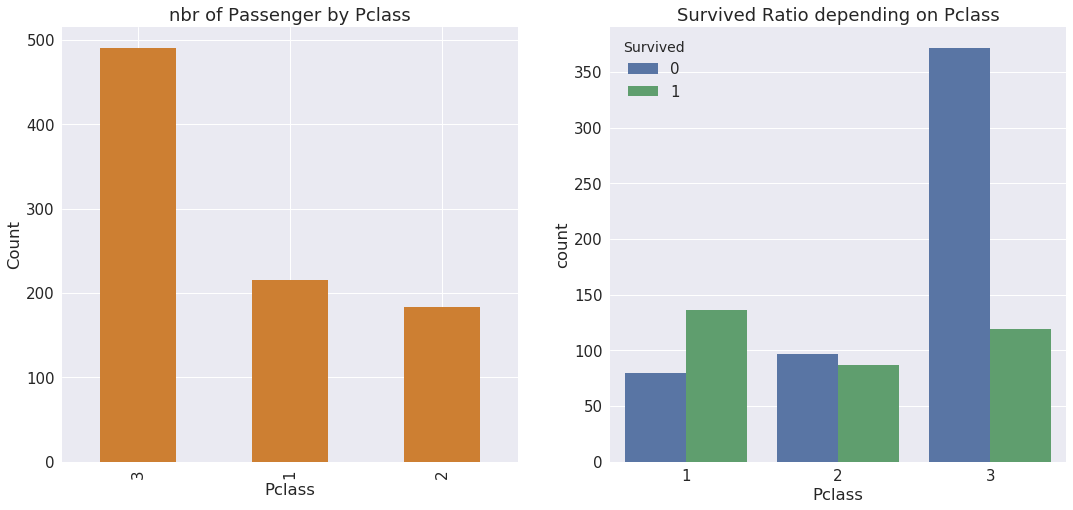

In [13]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(18, 8))
# 객실등급별 승객수
df_train["Pclass"].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title("nbr of Passenger by Pclass")
ax[0].set_xlabel("Pclass")
ax[0].set_ylabel("Count")

# 객실등급별 생존자 사망자 수 분포
sns.countplot(x="Pclass", hue="Survived", data=df_train, ax=ax[1])
ax[1].set_title("Survived Ratio depending on Pclass")

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

"돈이 모든것을 말해준다. Money talks."

승선한 승객수도 가장 많고,생존률도 가장 낮은 객실은 3등급 객실,생존률이 가장 좋은 객실은 1등급 객실이다. 

전체 사망자의 70%이상이 3등 객실에서 발생했으며, 배의 구조상 객실등급이 좋은 곳은 구조되기가 용이한 상층에 존재하는 배의 특성을 볼때 

구조가 용이하지 않았으리라는 것을 추측해볼 수 있다.

* **성별(Sex)와 객실등급(Pclass)을 조합하여 생존률**

In [14]:
index_col = [df_train['Sex'], df_train['Survived']]
col_name = [df_train['Pclass']]

# 성별_객실등급에 따른 생존자 비교
sex_pclass_survived = visualize_crosstab(index_col, col_name)
display(sex_pclass_survived)

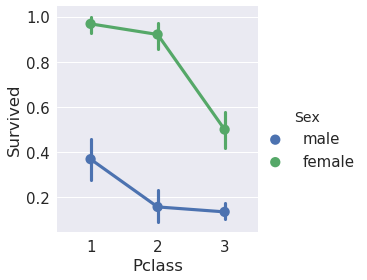

In [15]:
plt.figure(figsize=(18, 8))
sns.factorplot(x="Pclass", y="Survived", hue="Sex", data = df_train)
plt.show()

범주형피처들간의 구분을 쉽게 하기 위해서 **FactorPlot**를 사용합니다. 

**CrossTab** 및 **FactorPlot**을 통해 한 눈에 거의 대부분의 여성이 구조되었음을 알 수 있습니다. (객실등급이 1등급인 경우엔 3명의 여성분만 생존하지 못함)

보시는 바와 같이 객실등급(Pclass)와 성별은 중요한 피처로 보입니다.다른 피처도 같이 보도록 하겠습니다.

## Age--> 연속형 피처


* **Read Evaluate Print Loop**

In [16]:
display("The elderest's age : {}".format(df_train["Age"].max()))
display("The youngest's age : {}".format(df_train["Age"].min()))
display("The Passenger's average age : {}".format(df_train["Age"].mean()))
display("Null Count  : \n", df_train.isnull().sum())

print("Descritive statistics\n")
display(df_train.describe())

"The elderest's age : 80.0"

"The youngest's age : 0.42"

"The Passenger's average age : 29.69911764705882"

'Null Count  : \n'

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Descritive statistics



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* **모듈화**

In [17]:
def show_age_information():
    """
    Age피처의 통계 정보 
    """
    display("가장 연장자 : {} 세.".format(df_train['Age'].max()))
    display("가장 어린 승선자의 나이 : {} 세.".format(df_train['Age'].min()))
    display("승선객의 평균 나이 : {} 세.".format(df_train['Age'].mean()))
    
    print("\n 학습데이터 널 갯수 ")
    display(df_train.isnull().sum())
    
    print("\n 기술통계량")
    display(df_train.describe())
# 수행
show_age_information()

'가장 연장자 : 80.0 세.'

'가장 어린 승선자의 나이 : 0.42 세.'

'승선객의 평균 나이 : 29.69911764705882 세.'


 학습데이터 널 갯수 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


 기술통계량


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


위에서도 보듯이, Age의 경우 177개의 널값이 있습니다. 이 널값을 평균값으로 대치하기 위해선 몇가지 문제점이 있습니다.

연령대가 다양한 승객들이 있기때문에 아이들의 경우에도 평균값으로 대치될 수 있는 가능성이 있습니다. 

이러한 가능성을 조금은 더 없애기 위해, **이름**에 나오는 존칭을 가지고 연령대를 추론해보고자 합니다.

* **좌석등급으로 본 성별 생존률**

* **Read Evalulate Print Loop**

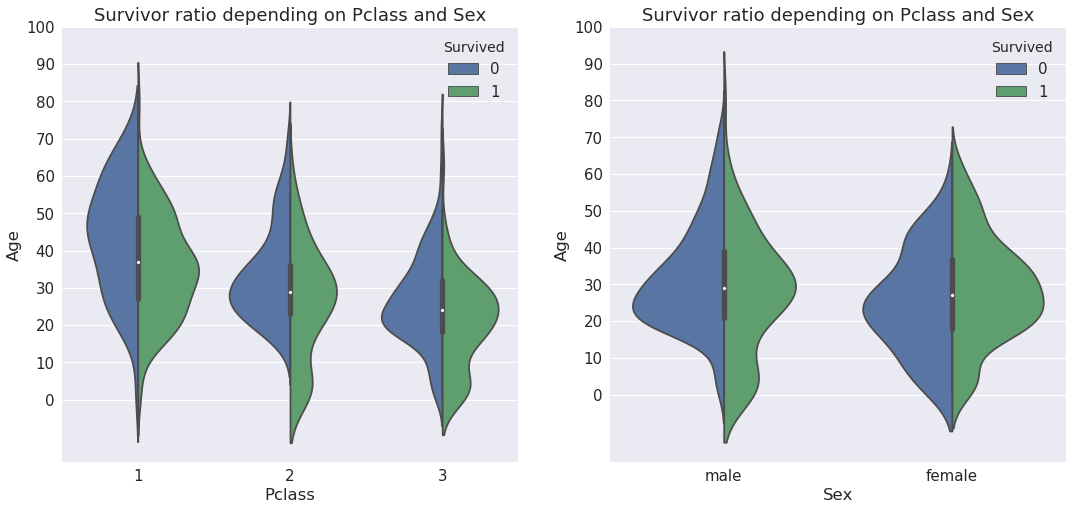

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

for i in range(2):
    sns.violinplot(x="{}".format("Pclass" if i ==0 else "Sex") , y="Age",  hue="Survived", data =df_train, split="{}".format(True if i ==0 else False), ax=ax[i])
    ax[i].set_title("Survivor ratio depending on Pclass and Sex")
    ax[i].set_yticks(range(0, 110, 10))
    
plt.show()    

* **모듈화**

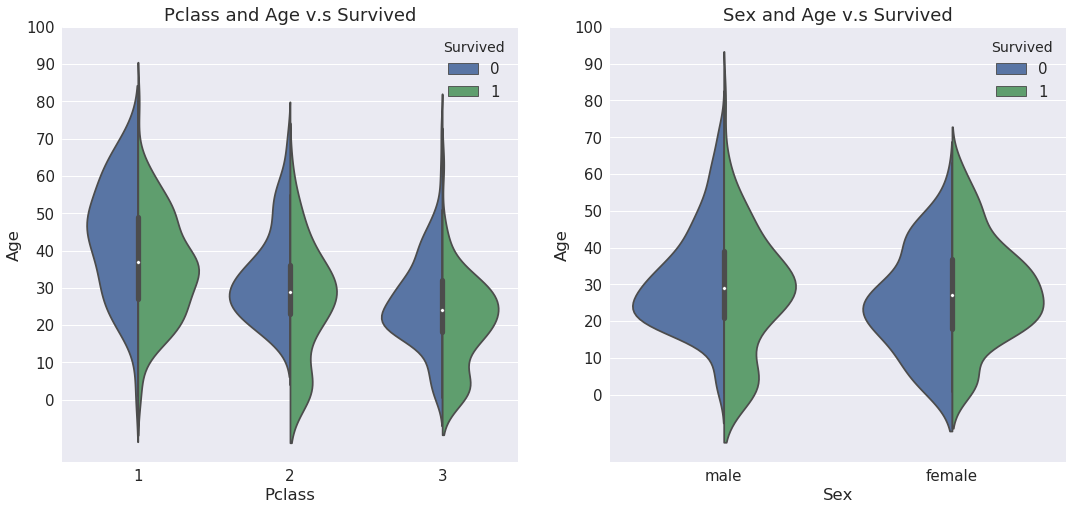

In [19]:
def visualize_violin(df, x: list, y: str):
    """
    x피처와 y피처간의 생존자의 분포 비교
    """
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
    
    for i in range(2):
        sns.violinplot(x="{}".format(x[0] if i==0 else x[1]), y=y, hue='Survived', data = df, split=True, ax=ax[i])
        ax[i].set_title("{0} and {1} v.s Survived".format(x[0] if i==0 else x[1], y))
        ax[i].set_yticks(range(0, 110, 10))
    plt.show()
    
# 객실등급, 성별을 연령과 비교해 생존자 분포 비교
visualize_violin(df_train, ['Pclass','Sex'], 'Age')    

#### Observations:

1)객실등급 및 성별에 상관없이 10살 이하의 아이의 경우엔, 생존률이 사망률을 앞지른다. (어린 아이들을 먼저 대피시킨것을 알 수 있다)

2)1등급 객실에 있는 연령대가 20대 ~ 50대 승객의 생존률이 여성에 비해 높은 것을 알 수 있다

3)남자의 경우엔, 높은 연령대 일수록 생존률이 감소함을 알 수 있다

* Age 피처 널값 대치를 위한 작업

In [20]:
df_train['Initial'] = None
for i in df_train:
    df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')  # Name피처에서 대소문자를 가지지 않고 .(dot)으로 끝나는 부분만 추출

In [21]:
# 성별에 따른 호칭 비교
sex_initial = visualize_crosstab([df_train["Initial"]], [df_train["Sex"]], True)
display(sex_initial)

display(sex_initial.columns)

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


Index(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major',
       'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
       'All'],
      dtype='object', name='Initial')

In [22]:
sex_initial = visualize_crosstab([df_train['Initial']], [df_train['Sex']], True)
display(sex_initial)

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [23]:
def feature_engineering(df, dropCols = None, InitialOpt=False, EmbarkedOpt=False, FamilyOpt=False, StringOpt=False, FeatureDrop=False):
    """
    피처엔지니어링 및 데이터 정제
    1.추가된 호칭의 오기된 호칭 정리
    2.Embarked피처 널 값 처리 
    3.문자형피처의 숫자값 처리 
    """ 
    if InitialOpt:
        df["Initial"] = df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'])
        df["Initial"] = df["Initial"].replace(["Mlle", "Mme", "Ms", "Dr", "Major", "Lady", "Countess", "Jonkheer","Col", "Rev", "Capt", "Sir", "Don"],
                             ["Miss", "Miss", "Miss", "Mr", "Mr", "Mrs", "Mrs", "Other", "Other", "Other", "Mr", "Mr", "Mr"])
    
    # 2.Embarked
    if EmbarkedOpt:
        df["Embarked"] = df["Embarked"].fillna('S')
        
    if FamilyOpt:
        df['Family_Size'] = df['SibSp'] + df['Parch']
        df['Alone'] = df['Family_Size'].apply(lambda x: 1 if x == 0 else 0)
    
    # 3.문자형 피처의 값을 숫자형으로 변환 
    if StringOpt:
        df["Sex"] = df["Sex"].replace(["male", "female"], [0, 1], inplace=False)
        df["Embarked"] = df["Embarked"].replace(["S", "C", "Q"], [0, 1, 2], inplace=False)
        df["Initial"] = df["Initial"].replace(["Mr", "Mrs", "Miss", "Master", "Other"], [0, 1, 2, 3, 4], inplace=False)
        
    if FeatureDrop:
        df.drop(labels = dropCols, axis = 1, inplace = True, errors='ignore')
    
    display(df.head(n=3))   
    return df  

In [24]:
# 철자가 틀린것 - Mlle, Mme를 Miss로 대치하도록 관련 함수 로직 추가
df_train = feature_engineering(df_train, InitialOpt=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


### Age피처 널값 처리 

* **Read Evaluate Print Loop**

In [25]:
df_age_mean = df_train.groupby("Initial")["Age"].mean().reset_index()
display(df_age_mean)

master_age_mean = df_age_mean.loc[df_age_mean["Initial"]=="Master", "Age"]
mr_age_mean = df_age_mean.loc[df_age_mean["Initial"]=="Mr", "Age"]
mrs_age_mean = df_age_mean.loc[df_age_mean["Initial"]=="Mrs", "Age"]
miss_age_mean = df_age_mean.loc[df_age_mean["Initial"]=="Miss", "Age"]
other_age_mean = df_age_mean.loc[df_age_mean["Initial"]=="Other", "Age"]

display("Master age mean - {}".format(np.round(master_age_mean)))
display("Mr age mean - {}".format(np.round(mr_age_mean)))
display("Mrs mean - {}".format(np.round(mrs_age_mean)))
display("Miss age mean - {}".format(np.round(miss_age_mean)))
display("Other age mean - {}".format(np.round(other_age_mean)))

,Initial,Age
0,Master,4.574167
1,Miss,21.860000
2,Mr,32.739609
3,Mrs,35.981818
4,Other,45.888889


'Master age mean - 0    5.0\nName: Age, dtype: float64'

'Mr age mean - 2    33.0\nName: Age, dtype: float64'

'Mrs mean - 3    36.0\nName: Age, dtype: float64'

'Miss age mean - 1    22.0\nName: Age, dtype: float64'

'Other age mean - 4    46.0\nName: Age, dtype: float64'

In [26]:
df_train["Age"].isnull().any()
df_train["Age"].isnull().sum()

177

In [27]:
def check_null_feature(col: str):
    """
    인자로 받은 피처에 대한 널체크 
    """
    display(df_train[col].isnull().any())
    display(df_train[col].isnull().sum())

In [28]:
def get_Initial_age_mean(df):
    """
    호칭별 평균 나이 구하기
    """    
    df_age_mean = df.groupby('Initial')['Age'].mean().reset_index()
    ## Assigning the NaN Values with the Ceil values of the mean ages
    master_age_mean = df_age_mean.loc[df_age_mean['Initial']=='Master', 'Age']
    mr_age_mean = df_age_mean.loc[df_age_mean['Initial']=='Mr', 'Age']
    mrs_age_mean = df_age_mean.loc[df_age_mean['Initial']=='Mrs', 'Age']
    miss_age_mean = df_age_mean.loc[df_age_mean['Initial']=='Miss', 'Age']
    other_age_mean = df_age_mean.loc[df_age_mean['Initial']=='Other', 'Age']
    display(df_age_mean)
    return master_age_mean, mr_age_mean, mrs_age_mean, miss_age_mean, other_age_mean

# 호칭별 평균 나이 구하기 
master_age_mean, mr_age_mean, mrs_age_mean, miss_age_mean, other_age_mean = get_Initial_age_mean(df_train)

,Initial,Age
0,Master,4.574167
1,Miss,21.860000
2,Mr,32.739609
3,Mrs,35.981818
4,Other,45.888889


In [29]:
display(mr_age_mean)
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=46

2    32.739609
Name: Age, dtype: float64

In [30]:
#Age피처가 널인것 확인 
# 변수에 담은면 이상하게 값이 업데이트가 안됨.
check_null_feature("Age")

False

0

* 연령대로 보는 생존자 히스토그램 

* **Read Evaluate Print Loop**

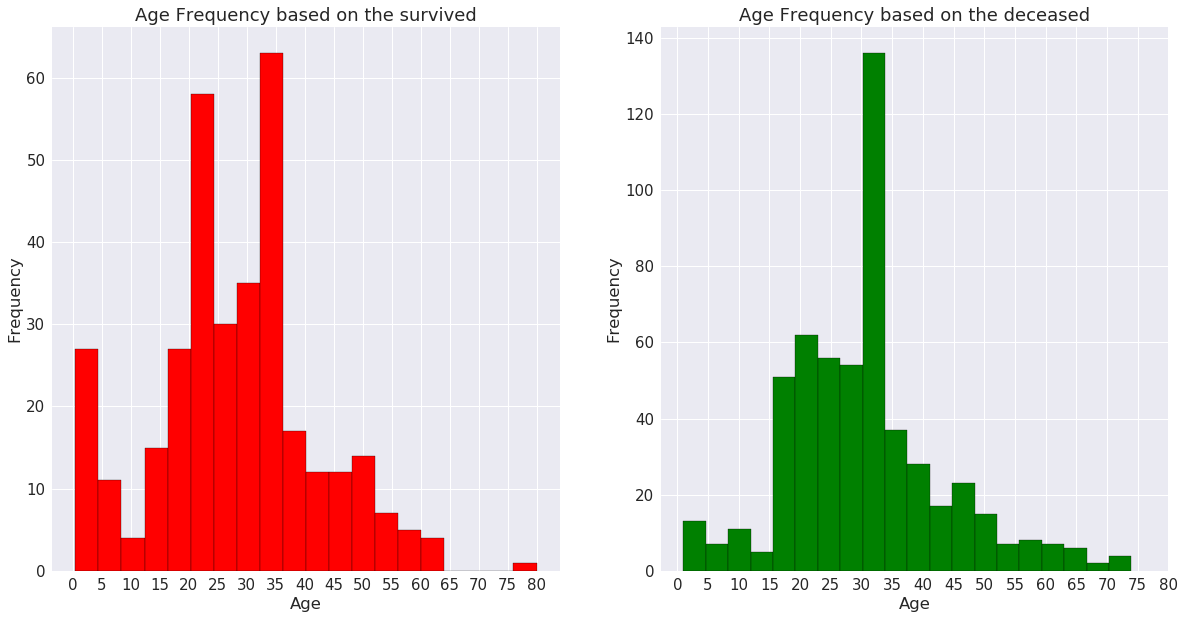

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
alive = df_train.loc[df_train["Survived"]== 1]["Age"]
deceased = df_train.loc[df_train["Survived"]==0]["Age"]

alive.plot.hist(ax = ax[0], edgecolor='black', color="red", bins=20)
ax[0].set_title("Age Frequency based on the survived")
ax[0].set_xlabel("Age")
ax[0].set_xticks(range(0, 85, 5))

deceased.plot.hist(ax = ax[1], edgecolor='black', color="green", bins=20)
ax[1].set_title("Age Frequency based on the deceased")
ax[1].set_xlabel("Age")
ax[1].set_xticks(range(0, 85, 5))

plt.show()

* **모듈화**

pandas.core.frame.DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,Mr


pandas.core.frame.DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


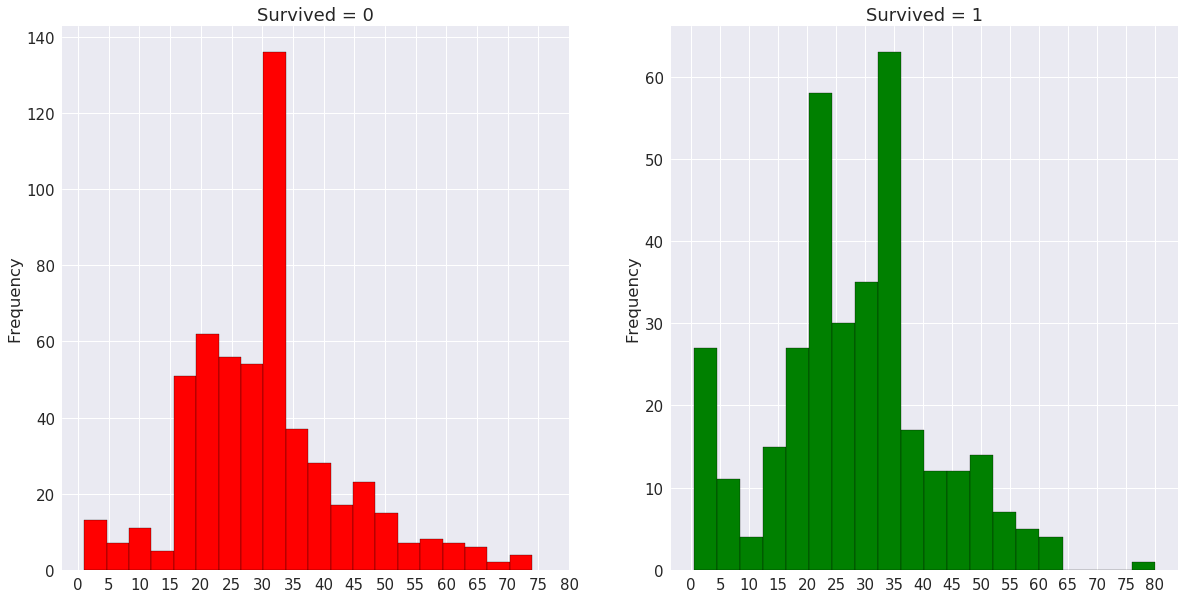

In [32]:
def plot_histogram_alive_deceased(alive, deceased):
    """
    연령대별 생존자와 사망자 히스토그램 비교
    """
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    alive['Age'].plot.hist(ax=ax[0], edgecolor='black', color='red', bins=20)
    ax[0].set_title("Survived = 0")
    ax[0].set_xticks(list(range(0, 85, 5)))  
    
    deceased['Age'].plot.hist(ax=ax[1], edgecolor='black', color='green', bins=20)
    ax[1].set_title("Survived = 1")
    ax[1].set_xticks(list(range(0, 85, 5)))  
    plt.show()

# 연령대별로 보는 사망자, 생존자 비교 
alive= df_train[df_train['Survived']== 0]
display(type(alive), alive.head(n=2))
deceased = df_train[df_train['Survived']== 1]
display(type(deceased), deceased.head(n=2))    
plot_histogram_alive_deceased(alive, deceased)

### Observations:
1)5살 이하의 유아가 대다수가 생존함(여성 및 아이먼저 구조)

2)최고령 생존자는 80세

3)가장 많은 사망자는 연령대가 30대에서 40대에 분포함

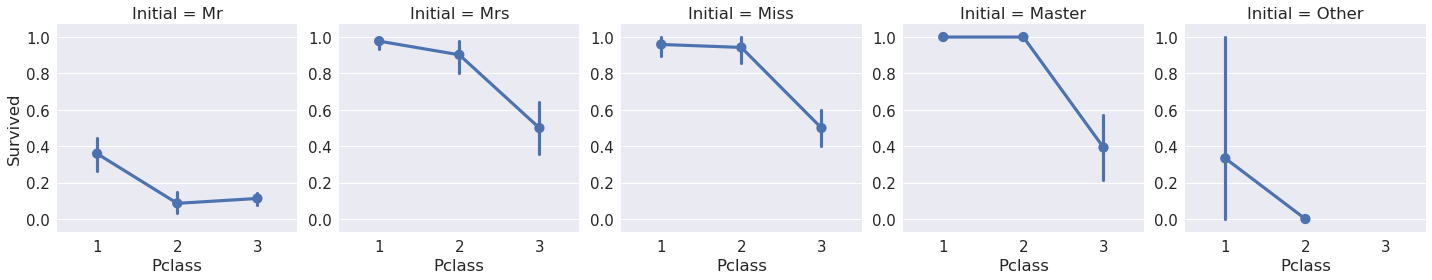

In [33]:
sns.factorplot(x="Pclass", y="Survived", col="Initial", data=df_train)
plt.show()

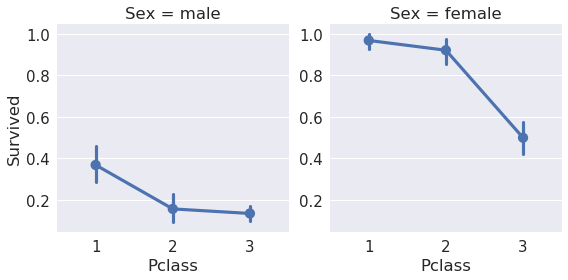

In [34]:
sns.factorplot(x="Pclass", y="Survived", col="Sex", data=df_train)
plt.show()

여자 및 아이먼저 구조한다는 정책은 객실등급에 상관없이 일관되게 유지되고있다.

## Embarked(경유 항구)--> 범주형 값

In [35]:
index_col = [df_train.Embarked,df_train.Pclass]
col_name = [df_train.Sex,df_train.Survived]
visualize_crosstab(index_col, col_name)

### **승선한 경유 항구별로 본 생존률 비교**

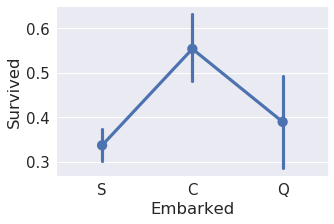

In [36]:
sns.factorplot(x="Embarked", y="Survived", data=df_train)
fig = plt.gcf()  # 현재 그려진 도형을 가져옴
# width, height
fig.set_size_inches(5, 3)
plt.show()

사우스 햄튼(S)에 탄 승객의 생존률은 현저히 낮은 반면, 셰르부르옥트빌(C - 프랑스 항구도시)에서 탑승한 승객의 생존률은 높다.

* **Read Evaluate Print Loop**

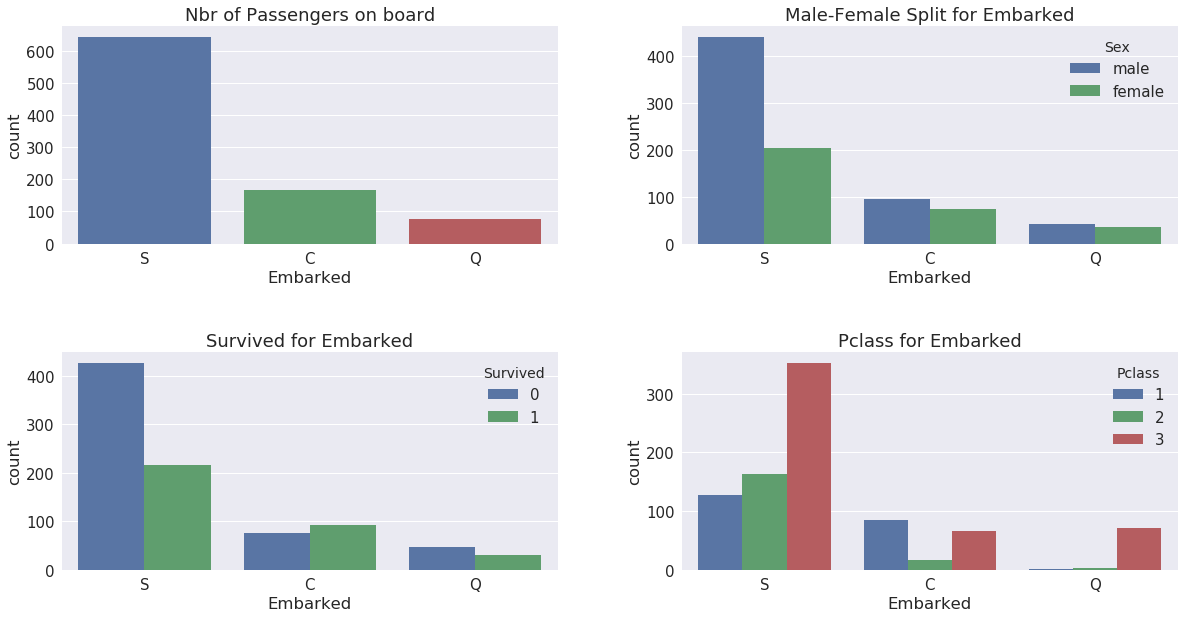

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
hue_cols = [None, "Sex", "Survived", "Pclass"]

for i in range(2):
    for j in range(2):
        hue = None
        if (i == 0) & (j ==0):
            hue = hue_cols[0]
        elif (i==0) & (j ==1):
            hue = hue_cols[1]
        elif (i ==1) & (j ==0):
            hue = hue_cols[2]
        else:
            hue = hue_cols[3]

        sns.countplot(x="Embarked", data=df_train, hue = hue , ax=ax[i][j])        
        title = None
        if (i ==0) & (j ==0):
            title="Nbr of Passengers on board"
        elif (i ==0) & (j ==1):
            title="Male-Female Split for Embarked"
        elif (i == 1) & (j ==0):
            title = "Survived for Embarked"
        else:
            title = "Pclass for Embarked"
        ax[i][j].set_title("{0}".format(title))
        
plt.subplots_adjust(wspace=0.25, hspace=0.5)   
plt.show()    

* **Modulization**

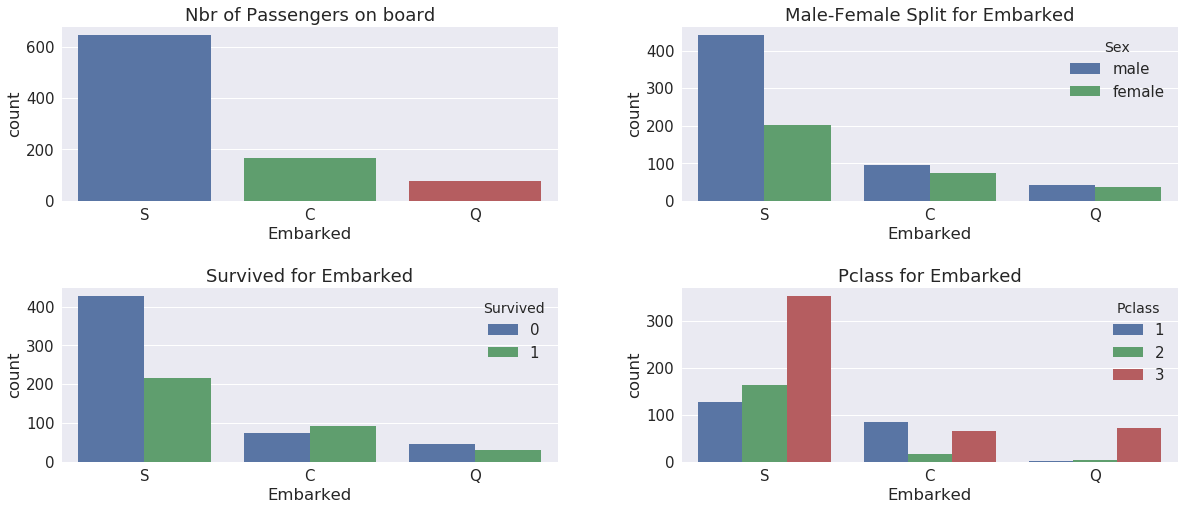

In [38]:
def show_survivor_on_embarked(df, hue_cols: list):
    """
    경유항구(Embarked)에 대하여 카테고리값(hue옵션)을 달리해서 가며
    시각화 
    """
    df_train = df.copy()
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
    for i in range(2):
        for j in range(2):
            hue = None
            if (i == 0) & (j ==0):
                hue = hue_cols[0]
            elif (i==0) & (j ==1):
                hue = hue_cols[1]
            elif (i ==1) & (j ==0):
                hue = hue_cols[2]
            else:
                hue = hue_cols[3]

            sns.countplot(x="Embarked", data=df_train, hue = hue , ax=ax[i][j])        
            title = None
            if (i ==0) & (j ==0):
                title="Nbr of Passengers on board"
            elif (i ==0) & (j ==1):
                title="Male-Female Split for Embarked"
            elif (i == 1) & (j ==0):
                title = "Survived for Embarked"
            else:
                title = "Pclass for Embarked"
            ax[i][j].set_title("{0}".format(title))

    plt.subplots_adjust(wspace=0.25, hspace=0.5)   
    plt.show()    
    
# 수행 
hue_cols = [None, "Sex", "Survived", "Pclass"]
show_survivor_on_embarked(df_train, hue_cols)

### Observations:
1)전체 승객의 60퍼센트가 넘는 승객이 사우스햄튼(S)에서 승선한 승객이며, 50% 이상의 승객이 3등급 객실에 투숙했으며, 60퍼센트 가까운 승객이 사망한 것으로 파악됨

2)객실등급 1등급, 2등급에 묵은 승객의 생존률이 높다. 사망자가 3등급 객실에 집중되어 있고, 객실의 구조상 아래층에 위치할수 밖에 없어 구조의 손길이 미치지 못했음을 알 수 있다.

3)사우스햄튼에서 승선한 승객의 60% 이상은 3등급 객실에 투숙했으며, 대부분이 가난한 이주민이지 않았을까 하는 추측이다. 

4)퀸스타운(Q)에서 승선한 승객의 90%이상은 3등급 객실에 투숙했으며,50%이상이 사망.

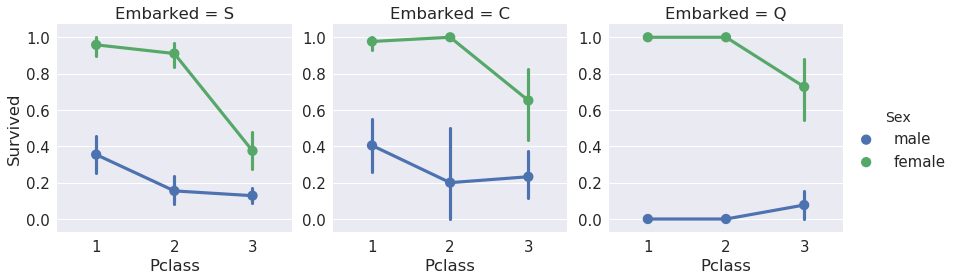

In [39]:
#위의  Pclass for Embarked그래프랑 동일함을 알 수 있다.
sns.factorplot(x="Pclass", y="Survived", data = df_train, col="Embarked", hue="Sex")
plt.show()

### Observations:

1)객실등급에 관계없이 여성인 경우의 생존률은 1에 가까울 수록 높다고 할수있다.

2)"Money talks"만 말은 지금과 과거는 다름이 없다.

그래서 사람들의 시선이 돈에 머물러 있을 수 밖에 없다.

**<span style="color:red">데이터 속에 보이지 않는 수많은 희생들에 대한 이야기들을 끄집어 내는것이 필요하다.(Story telling behind data)</span>**

### Embarked(경유 항구)
* 가장 많은 승객이 탄 사우스햄튼(S)로 널 값을 대치하기로 하자(2개의 널값이 존재하였음)

In [40]:
# 2개의 널값을 'S'로 대치 
df_train = feature_engineering(df_train, EmbarkedOpt=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


In [41]:
# 널값이 없음
check_null_feature("Embarked")

False

0

## SibSip--> 비연속적인 피처
* Sibsling + Spouse : 손자, 손녀 ,자손 및 배우자 포함 
* 혼자인지 동반한 형제 , 자매가 있는지 알려주는 피처로 혼자이면 0이고, 0보다 크면 1명이상인 경우이다.

* 자녀 = 형제, 자매, 배다른 형제, 자매

* 배우자 = 남편 혹은 아내

In [42]:
# Read Evlaulate Print Loop
pd.crosstab(index=df_train["SibSp"], columns=df_train["Survived"], margins=True).style.background_gradient(cmap="summer_r")

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


In [43]:
index_col = df_train['SibSp']
col_name = df_train['Survived']
# 함수 호출
visualize_crosstab(index_col, col_name,True)

SibSp,0,1,2,3,4,5,8,All
Survived,,,,,,,,
0,398,97,15,12,15,5,7,549
1,210,112,13,4,3,0,0,342
All,608,209,28,16,18,5,7,891


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98e90ae898>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f98e8d99358>], dtype=object)

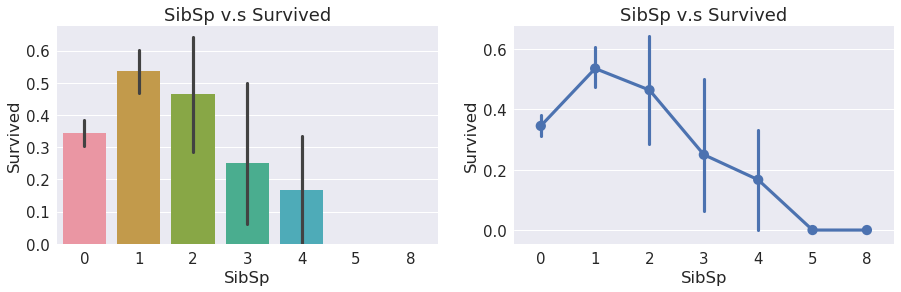

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
display(ax)
sns.barplot(x="SibSp", y="Survived", data = df_train, ax = ax[0])
ax[0].set_title("SibSp v.s Survived")

sns.factorplot(x="SibSp", y="Survived", data=df_train, ax=ax[1])
ax[1].set_title("SibSp v.s Survived")
plt.close(2)
plt.show()

In [45]:
visualize_crosstab([df_train['SibSp']], [df_train['Pclass']])

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


### Observations:

타이타닉 침몰시간 : on 14, April, 1914 at 11:40 P.M

잠을 잘 수 있는 시간일수도있고 아닐수도 있지만 동반 가족이 없는 경우의 생존률이 동반가족이 1~2명 있는 경우보다 생존률이 떨어짐을 알 수 있다. 

3명이하인 경우라면, 대응할 수 있는 수준이라고 볼 수 있지만, **동반가족이 3명이상으로 늘어나게 되면 생존이 쉽지 않음**을 보여준다.(3명이상을 기점으로 생존률이 하락)

동반가족이 5인 ~ 8인은 생존율이 0% 비율로 떨어진다.

## Parch
- 부모 동반(Parent  + Children)

In [46]:
# 객실마다 얼마다 부모 및 아이가 있는지 확인
pd.crosstab(index=df_train["Parch"], columns = df_train["Pclass"], margins=False).style.background_gradient(cmap="summer_r")

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


In [47]:
visualize_crosstab([df_train['Parch']], [df_train['Pclass']], True)

Parch,0,1,2,3,4,5,6,All
Pclass,,,,,,,,
1,163,31,21,0,1,0,0,216
2,134,32,16,2,0,0,0,184
3,381,55,43,3,3,5,1,491
All,678,118,80,5,4,5,1,891


3등급 객실에 3인 이상의 동반가족이 집중되어 있음을 보여준다. 

1등급 객실 혹은 2등급 객실에 3인 이상의 동반가족을 위한 객실이 준비되지 않았음을 추론이 가능하다. 왜?

Business is business. business is first before human life.

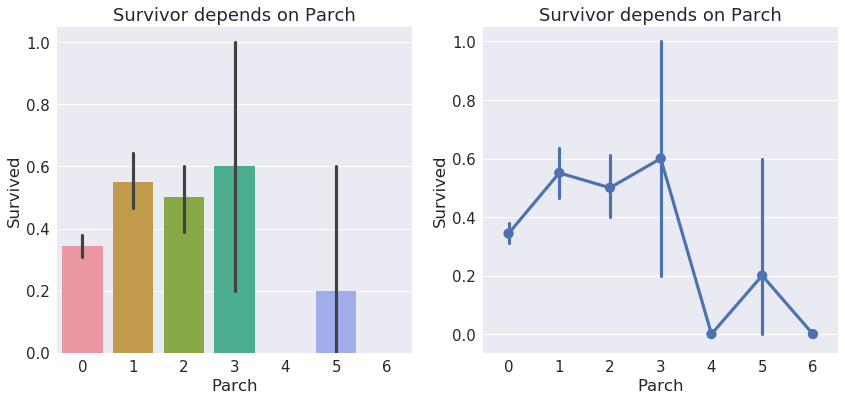

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.barplot(x="Parch", y="Survived", data = df_train, ax = ax[0])
ax[0].set_title("Survivor depends on Parch")

sns.factorplot(x="Parch", y="Survived", data = df_train, ax= ax[1])
ax[1].set_title("Survivor depends on Parch")

plt.tight_layout()
plt.close(2)
plt.show()

### Observations:

부모 동반자가 있는 경우는 생존할 확률이 상당히 높지만 , 이 수치도 동반 숫자가 늘어나면 급격하게 생존 가능성이 감소함을 보인다.

또한 동반 가족이 없는 경우는 생존 확률이 상당히 낮음을 알 수 있다. 비상시에는 도움을 받을 수 있는 존재가 있느냐 없느냐의 차이는 여기서 나타난다고 할 수 있겠다.

<span style="color:red">**When you travel or go abroad, you shoud need somebody to go with you**</span>

## Fare--> 연속형 피처
* 객실등급별 요금의 히스토그램과 Kde Plot을 함께 시각화
* Fare의 최대값, 최소값, 평균값

In [49]:
print('Highest Fare was:',df_train['Fare'].max())
print('Lowest Fare was:',df_train['Fare'].min())
print('Average Fare was:',df_train['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


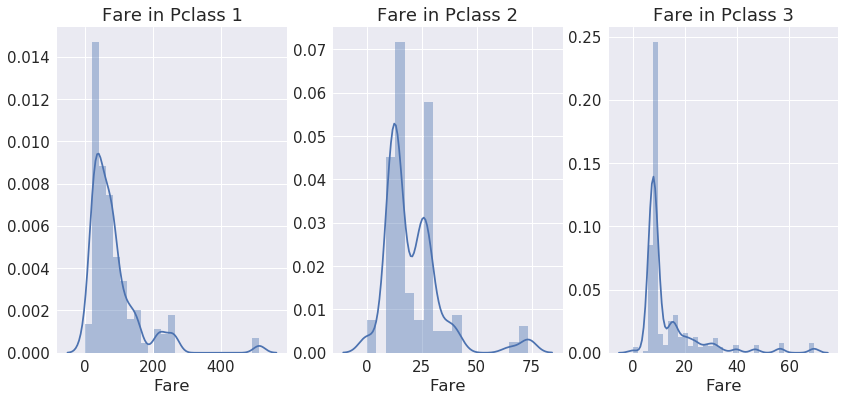

In [50]:
fig, ax = plt.subplots(nrows=1, ncols = 3, figsize=(14, 6))

cond_pclass1= df_train[df_train["Pclass"]==1]["Fare"]
cond_pclass2= df_train[df_train["Pclass"]==2]["Fare"]
cond_pclass3= df_train[df_train["Pclass"]==3]["Fare"]


sns.distplot(a= cond_pclass1, ax = ax[0])
ax[0].set_title("Fare in Pclass 1")

sns.distplot(a =cond_pclass2, ax = ax[1])
ax[1].set_title("Fare in Pclass 2")

sns.distplot(a =cond_pclass3, ax = ax[2])
ax[2].set_title("Fare in Pclass 3")

plt.show()

## 생존률에 영향을 줄수 있는 피처 :
* **Sex:** 남자에 비해 여성의 생존비율이 훨씬 높다.
* **Pclass:**1등급 객실의 승객의 생존률이 높다
* **3등급 객실의 경우는 생존률이 낮음**. 
* **Age:** 5세 이하의 아이의 경우는 생존 할 가능성이 높았음. 15 ~ 35세의 연령대의 생존률이 낮았음
* **Embarked:** 사우스햄튼(S)에 승선한 승객의 대부분은 3등급 객실에 묵었으며, 많은 사망자가 나왔음. 반면에 프랑스 셰르부르옥트빌(C)의 승객들도 3등급 객실에 많았으나 사우스햄튼보다는 생존률이 더 나았음.
* **Parch+SibSp:** 동반 가족의 수가 생존률에 영향을 주는것으로 확인이 됨(3명 이상의 동반 가족이 있을 경우엔 생존 할 가능성이 낮아짐), 
3명 이하인 경우는 오히려 생존 가능성이 좋은 것으로 확인됨.

## 피처간의 상관관계
* 히트맵으로 피처간의 상관관계를 보기

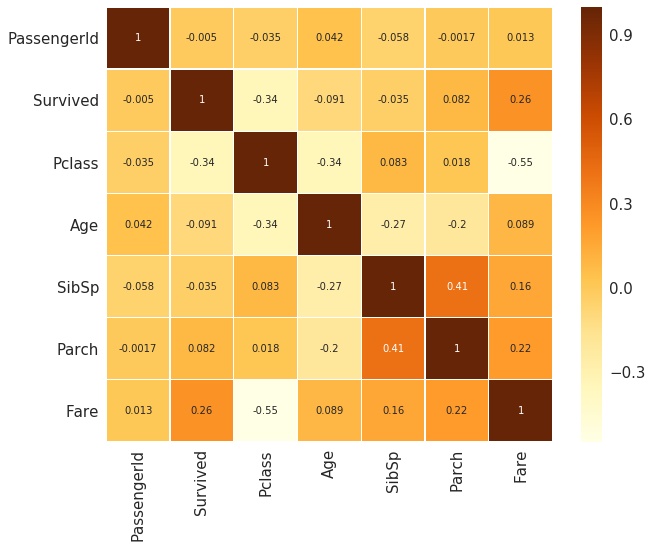

In [51]:
heatmap = df_train.corr()

sns.heatmap(data = heatmap, cmap = "YlOrBr", annot=True, linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### 히트맵 해석

**양의 상관관계(POSITIVE CORRELATION) :** **B피처가 증가함에 따라 A피처도 증가하면 , 우리는 이것을 양의 상관관계라고 한다.**. 

**1 - 강한 양의 상관관계를 의미**.

**음의 상관관계(NEGATIVE CORRELATION):** If an **B피처가 감소함에 따라 A피처도 감소할때 우리를 이것을 음의 상관관계라 한다**. 

**-1 - 강한 음의 상관관계**.

두 피처가 높은 상관관계를 갖으면, 두 피처는 상당한 정도로 유사한 정보를 갖고있다고 볼수 있으며 통계학에서는 이러한 것들 다중공선성(multicolinearity)라 부른다.
그래서 이러한 다중 공선성을 갖는 피처들은 예측 모델을 생성하는 단계에서는 삭제하는 것을 고려해보아야 한다.

하지만, 위의 히트맵에서는 그러한것들이 특별하게 보이지는 않아서 모든 피처들을 고려하기로 한다.

## Part2: 피처엔지니어링 및 데이터 정제
* 피처의 추가 및 삭제
* 중복된 피처 혹은 불필요한 피처 삭제

## Age_band(연령대)

#### 나이 피처 고려사항:

**연속형 값을 범주형 값으로 변환을 고려(구간분할 혹은 이산화, binning)**

나이의 최대값이 80이고, 0세부터 80세까지 잡아서 5개의 빈으로 나누면 80/ 5 = 16개의 빈으로 나뉠수 있다

In [52]:
def get_age_band(age):
    """
    나이를 연령대를 숫자형으로 구분하기하기 위해 
    범주형 숫자 타입으로 변경
    """
    age_band = 0
    if age <= float(16):
        age_band = 0
    elif (age > float(16)) & (age <= float(32)):
        age_band = 1
    elif (age > float(32)) & (age <= float(48)):
        age_band = 2
    elif (age > float(48)) & (age <= float(64)):
        age_band = 3
    else:
        age_band = 4
    return age_band

# 연령대를 리턴
df_train["age_band"] = df_train["Age"].apply(lambda x: get_age_band(x))
display(df_train.tail(2))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,age_band
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr,1
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Mr,1


In [53]:
# age_band의 빈도표를 DataFrame으로 변환해 보여주기
df_train['age_band'].value_counts().to_frame()

,age_band
1,382
2,325
0,104
3,69
4,11


In [54]:
# 데이터프레임에 스타일
df_train["age_band"].value_counts().to_frame().style.background_gradient(cmap="summer_r")

,age_band
1,382
2,325
0,104
3,69
4,11


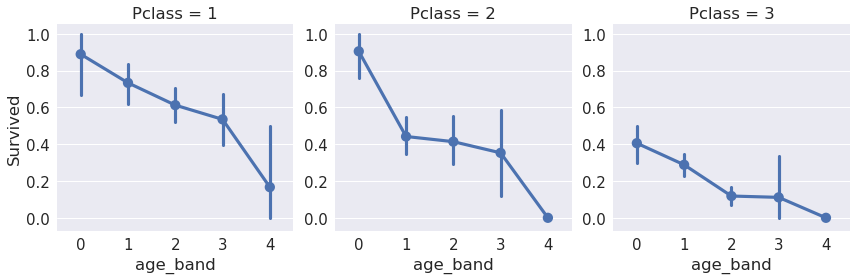

In [55]:
sns.factorplot(x="age_band", y="Survived", col="Pclass", data = df_train)
plt.show()

<span style="color:red">객실등급에 상관없이 연령이 높아질수록 생존율은 감소</span>

## Family_Size and Alone
Family_Size : 동반 가족수(SibSp + Parch)

Alone : 혼자여부(1 - 혼자, 0 - 동반가족있음)

In [56]:
# Family_Size와 Alone피처 추가 
df_train = feature_engineering(df_train, FamilyOpt=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1


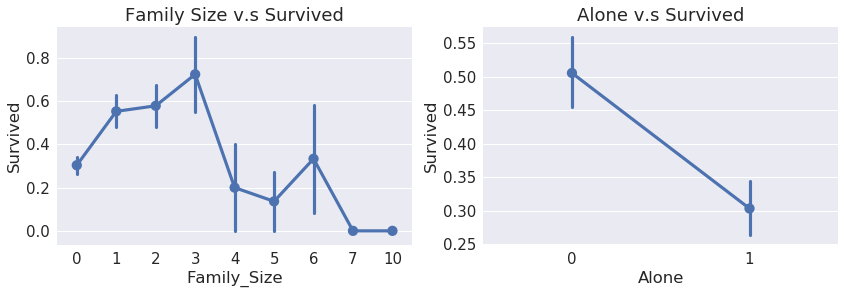

In [57]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(14, 4))

sns.factorplot(x="Family_Size", y="Survived", data = df_train, ax = ax[0])
ax[0].set_title("Family Size v.s Survived")

sns.factorplot(x="Alone", y="Survived", data=df_train, ax=ax[1])
ax[1].set_title("Alone v.s Survived")
plt.close(2)
plt.close(3)
plt.show()

**Family_Size=0  - 동반가족없이 혼자인 승선객** 
* 가족없이 혼자 승선한 탑승객의 경우는 생존률이 현저하게 떨어짐(Alone값이 1)
* Family_Size가 4인 이상인 경우도 생존률이 감소함(예측모델을 생성시에 중요한 피처로 작용할 것으로 판단됨)

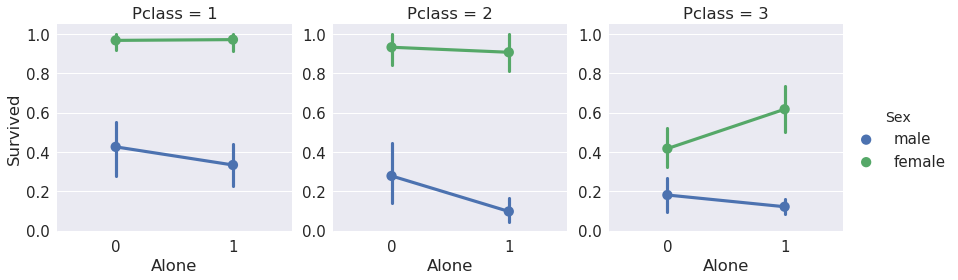

In [58]:
sns.factorplot(x="Alone", y="Survived", data = df_train, col="Pclass", hue="Sex")
plt.show()

보는바와 같이 동반 가족이 없는 나홀로 승객의 생존률은 객실등급과는 상관없이 낮은것을 알수 있다.반면에 객실등급이 3등급의 경우는 , 나홀로 탑승객일지라도 여자의 경우는 생존율이 높다.

## Fare_Range(요금 영역대 분류)

요금 피처는 연속형 피처이므로 , ML에서 사용하기 위해서는 순서형 데이터로 변환해야 한다(이산화를 위한 분위수)

이를 위해서는 우리는 판다스에서 제공하는 **pandas.qcut**을 사용하려고 한다.

[pandas.qcut 참조](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html?highlight=qcut#pandas.qcut)

In [59]:
qcut = pd.qcut(range(5), 4)
display(len(qcut), qcut)

pd.qcut(range(5), 3, labels=["good", "medium", "bad"])

5

[(-0.001, 1.0], (-0.001, 1.0], (1.0, 2.0], (2.0, 3.0], (3.0, 4.0]]
Categories (4, interval[float64]): [(-0.001, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 4.0]]

[good, good, medium, bad, bad]
Categories (3, object): [good < medium < bad]

In [60]:
# 요금대의 4개의 빈으로 균등하게 나눈다
df_train["Fare_Range"] = pd.qcut(df_train["Fare"], 4)
df_train["Fare_Range"].value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: Fare_Range, dtype: int64

In [61]:
# 요금이 고액으로 올라갈수록 생존율이 높아짐을 보임
# 중요피처로 추가하는것이 중요


display(df_train.groupby(["Fare_Range"])["Survived"].mean())

# Descending order
display(df_train.groupby(["Fare_Range"])["Survived"].mean().sort_values(ascending=False).to_frame())
display(df_train.groupby("Fare_Range")["Survived"].mean().to_frame())
display(df_train.groupby("Fare_Range")["Survived"].mean().to_frame().style.background_gradient(cmap="summer_r"))

Fare_Range
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

,Survived
Fare_Range,
"(31.0, 512.329]",0.581081
"(14.454, 31.0]",0.454955
"(7.91, 14.454]",0.303571
"(-0.001, 7.91]",0.197309


,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


요금대(Fare-Range)가 고액으로 올라갈수록 생존률도 높아짐을 알수있다. 예측 모델에 중요 피처로 넣어야 함을 알수있다.

Age_band 피처와 마찬가지로 피처엔지니어링 필요

In [62]:
def get_fare_cat(fare):
    """
    Categorized Fare feature into Fare band
    """
    fare_cat = 0
    if fare <= 7.91:
        fare_cat = 0
    elif (fare > 7.91) & (fare <= 14.454):
        fare_cat = 1
    elif (fare > 14.454 ) & (fare <= 31.0):
        fare_cat = 2
    elif (fare > 31) & (fare <= 513):
        fare_cat = 3
    return fare_cat      

In [63]:
def get_fare_cate(fare):
    """
    categorized Fare feature into Fare band
    """
    fare_cat = 0
    if fare <= 7.91:
        fare_cat = 0
    elif (fare > 7.91) & (fare <= 14.454):
        fare_cat = 1
    elif (fare > 14.454) & (fare <= 31.0):
        fare_cat = 2
    elif (fare > 31) & (fare <= 513):
        fare_cat = 3
    return fare_cat

# 요금대 피처 추가 
df_train['fare_cat'] = df_train['Fare'].apply(lambda x: get_fare_cate(x))

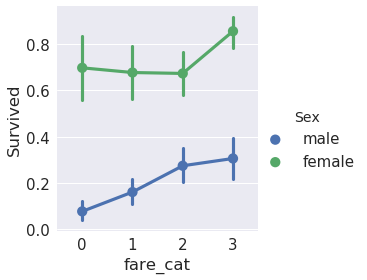

In [64]:
sns.factorplot(x="fare_cat", y="Survived", hue="Sex", data = df_train)
plt.show()

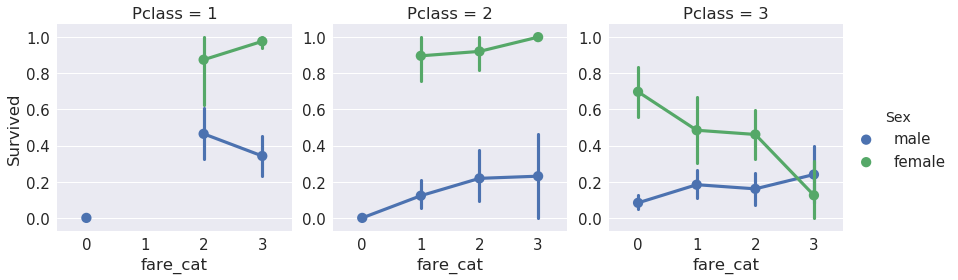

In [65]:
sns.factorplot(x="fare_cat", y="Survived", hue="Sex", col="Pclass", data=df_train)
plt.show()

**성별(Sex)피처와 함께 요금대(Fare band)피처도 생존률을 예측하는데 중요피처로 고려해야 함을 보여줌**
* <span style="color:red">**요금대가 비싸면 그에 어느정도 비례해 생존률도 높다**</span>

## 문자열 피처를 숫자형으로 변환

* ML모델에 문자형을 학습시킬수 없기 때문에 문자형 데이터타입을 숫자형으로 바꾸어야 한다.
* 판다스에서 제공하는 pandas.get_dummies API도 있으나 피처늘어나기 때문에 여기서는 값을 대치하는방법 사용


In [66]:
df_train = feature_engineering(df_train, StringOpt=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,age_band,Family_Size,Alone,Fare_Range,fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1


### 불필요한 피처 삭제 

**Name**--> Name피처를 통해 Initial피처 도출했으므로 Name피처의 역할은 다했다.

**Age**--> Age_band피처를 도출했으므로 역할은 다했음

**Ticket**--> 불필요함

**Fare**--> Fare_cat피처를 도출했으므로 역할을 다 했음

**Cabin**--> 널값이 많으므로 무의미한 피처로 삭제

**Fare_Range**--> Fare_cate피처가 있으므로 불필요

**PassengerId**--> 의미없는 일련번호의 성격이므로 삭제

In [67]:
dropCols = ['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId']
df_train = feature_engineering(df_train, dropCols, FeatureDrop=True)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,age_band,Family_Size,Alone,fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1


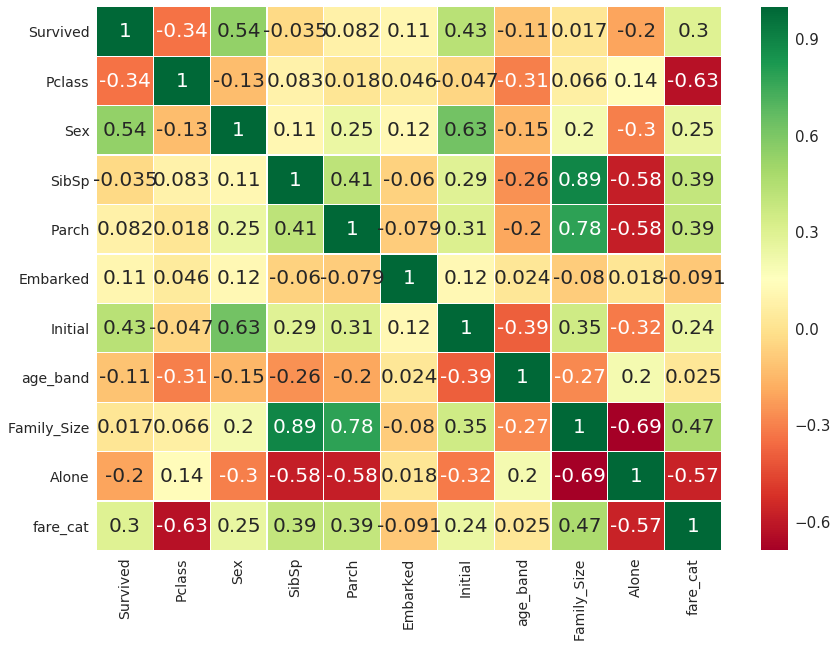

In [68]:
sns.heatmap(df_train.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(14, 10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

위의 상관관계를 보면 **SibSp와 Family_Size** 그리고 **Parch와 Family_Size**는 강력한 양의 상관계를 갖고 **Alone과 Family_Size**음의 상관관계를 갖는다.

# Part3: 예측 모델링

예측해보고자 하는 ML모델:

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

* **Importing all the required packages**

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#정확도 평가 및 오차행렬
from sklearn.metrics import accuracy_score, confusion_matrix

* **Read Evaluate Print Loop**

In [70]:
X = df_train.iloc[:, 1:]  # feature
y = df_train.iloc[:, 0]   # label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0, stratify=df_train["Survived"])
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(623, 10)

(268, 10)

(623,)

(268,)

* **함수화**

In [71]:
def split_train_test_dataset(df):
    """
    데이터프레임을 피처, 레이블, 학습, 테스트 데이터셋으로 분리
    """
    X = df.iloc[:, 1:]  # feature
    y = df.iloc[:, 0]   # label

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0, stratify=df["Survived"])
    display(X_train.shape, X_test.shape, y_train.shape, y_test.shape, X.shape, y.shape)
    
    return X_train, X_test, y_train, y_test, X, y

# 학습 및 테스트 데이터셋 분리 
X_train, X_test, y_train, y_test, X, y = split_train_test_dataset(df_train)

(623, 10)

(268, 10)

(623,)

(268,)

(891, 10)

(891,)

In [72]:
models = []
def fit_predict_model(models: list):
    """
    모델을 입력받아 학슴 및 테스트 데이터셋을 인자를 학습, 예측 , 평가
    """
    accuracy_scores = dict()
    for model in models:
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        accuracy_point = accuracy_score(y_test, prediction)
        
        display("Accuracy for {} is {}".format(model.__class__.__name__, accuracy_point))
        accuracy_scores[model] = accuracy_point
    return accuracy_scores

### 머신러닝 모델 선언

In [73]:
# Radial Support Vector Machines(rbf-SVM)
SVM = SVC(C = 1.0, kernel="rbf", gamma=0.1 ,probability=True)

### Linear Support Vector Machine(linear-SVM)
linearSVM = SVC(kernel="linear", C=0.1, gamma=0.1)

#Logistic Regression - 로지스틱회귀¶
lr = LogisticRegression()

# DecisonTree
dt_clf = DecisionTreeClassifier()

# K-Nearest Neighbours(KNN) - K최근접이웃 기법
KNN = KNeighborsClassifier(n_neighbors=10)

**n_neighbors**값을 변경해보면서 정확도를 평가해보자.KNN의 n_neighbors의 디폴트값은 5

In [74]:
# 각 ML모델 학습 , 예측 및 평가 수행 
# 최근접이웃기법이 가장 정확도가 좋음
models = [KNN, dt_clf, lr, linearSVM, SVM]
accuracy_socres = fit_predict_model(models)

'Accuracy for KNeighborsClassifier is 0.832089552238806'

'Accuracy for DecisionTreeClassifier is 0.8059701492537313'

'Accuracy for LogisticRegression is 0.8171641791044776'

'Accuracy for SVC is 0.8171641791044776'

'Accuracy for SVC is 0.835820895522388'

* **K최근접이웃기법 : n_neighbors갯수를 늘리면서 수행**

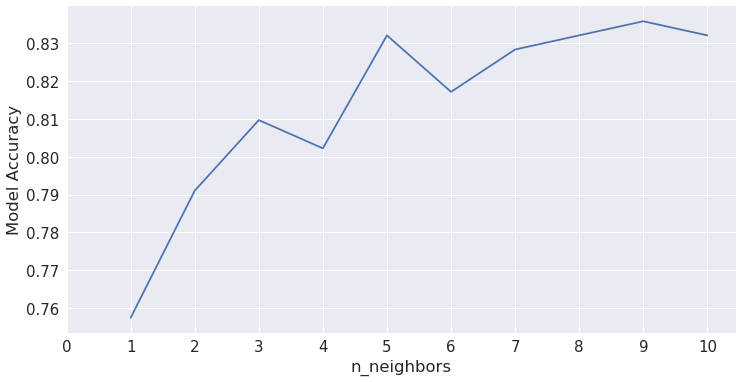

Accuracies for different vlaues of n are: [ 0.75746269  0.79104478  0.80970149  0.80223881  0.83208955  0.81716418
  0.82835821  0.83208955  0.8358209   0.83208955], withe the max values as 0.835820895522388


In [75]:
step_idx = list(range(1, 11))  # 10회 테스트
scores = pd.Series()

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in step_idx:
    model = KNeighborsClassifier(n_neighbors=i, n_jobs = -1)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    
    scores = scores.append(pd.Series(accuracy_score(y_test, prediction)))
    
plt.plot(step_idx, scores)
plt.xlabel("n_neighbors")
plt.ylabel("Model Accuracy")
plt.xticks(x)

fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

print("Accuracies for different vlaues of n are: {}, withe the max values as {}".format(scores.values, scores.values.max()))

### Gaussian Naive Bayes  v.s Random Forests

In [76]:
models = []

gbn = GaussianNB()
rf = RandomForestClassifier(n_estimators=500,min_samples_split=3)

models = [gbn, rf]

# 학습 및 수행
accuracy_scores = fit_predict_model(models)

'Accuracy for GaussianNB is 0.8134328358208955'

'Accuracy for RandomForestClassifier is 0.8208955223880597'

Accuracy for GaussianNB is **0.8134328358208955**

Accuracy for RandomForestClassifier is **0.8208955223880597**

### Random Forests

모델의 정확도가 Classifier의 안정성을 결정하는 유일한 결정요인은 아닙니다. 
분류기가 학습데이터로 학습되고 , 테스트 데이터로 검증된 결과, 정확도가 90%된다고 하고 가정해봅시다.


분류기에게는 아주 좋은 정확도처럼 보이지만, 이 모델의 정확도가 모든 테스트 데이터셋에서도 그러한 결과를 나온다는 것은 보장할 수 있을까요?

대답은 "아닙니다." 입니다. 

왜냐하면, 학습 및 테스트 데이터셋이 변경되면 해당 모델의 정확도 또한 변경되기 마련이기 때문입니다.

정확도는 증가할수 도있고, 혹은 감소할 수 도 있습니다.

이런 정확도의 변동을 **모델 변동성(model variance)**이라고 합니다.

이러한 model variance를 극복하기 위해 이제는 **교차검증(cross validation)**을 해보도록 하겠습니다.

# 교차검증(Cross Validation)
* Use Pima North america indian diabetes datasets

In [77]:
from sklearn.model_selection import (KFold, cross_val_score, cross_val_predict)
from sklearn.linear_model import Lasso
from sklearn.datasets import load_diabetes
from sklearn.metrics import (accuracy_score, precision_score, recall_score, confusion_matrix)  # evaluation
import numpy as np

* crosss vlaidation example

In [78]:
diabetes = load_diabetes()
diabetes.data.shape, diabetes.target.shape

X_data = diabetes.data
y_data = diabetes.target

lasso = Lasso(alpha=0.05)
cross_val_score(lasso, X_data, y_data)

array([ 0.46114648,  0.49419853,  0.5078856 ])

In [79]:
def get_validation_score(models, X, y, n_splits=None):
    """
    models - estimator
    n_splits - 폴드를 나뉠 갯수 
    X - 피처 
    y - 레이블
    기능 : 
    정확도 평균 및 표준편차정보를 데이터프레임으로 보여주고, 분류기별 정확도를 시각화
    """
    kfold = KFold(n_splits = n_splits, shuffle=False, random_state=22)
    means = []
    accuracies = []
    stds = []
    classifiers = ['Linear SVM', 'Radial SVM', 'Logistic Regression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'GaussianNB', 'RandomForest']
    for model in models:
        cv_result = cross_val_score(model, X, y, scoring='accuracy', cv = kfold, n_jobs=-1, verbose=True)
        means.append(cv_result.mean())
        stds.append(cv_result.std())
        accuracies.append(cv_result)
    
    model_df = pd.DataFrame(data = {"CV mean":means, "Stds": stds}, index = classifiers)
    
    # 데이터 프레임 보여주기
    display(model_df)
    
    # 정확도 시각화
    visualize_accuracy_byClf(classifiers, accuracies)    
    
    return model_df

In [80]:
def visualize_accuracy_byClf(classifiers, accuracies):
    """
    분류기별 정확도를 박스플롯으로 시각화
    """
    plt.subplots(figsize=(12, 6))
    box = pd.DataFrame(data = accuracies, index = classifiers)
    display(box)
    display(box.T)
    box.T.boxplot(rot=90)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s finished


,CV mean,Stds
Linear SVM,0.793471,0.047797
Radial SVM,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNeighborsClassifier,0.813783,0.041210
DecisionTreeClassifier,0.805868,0.030346
GaussianNB,0.801386,0.028999
RandomForest,0.817066,0.030122


,0,1,2,3,4,5,6,7,8,9
Linear SVM,0.811111,0.831461,0.752809,0.876404,0.775281,0.808989,0.741573,0.730337,0.853933,0.752809
Radial SVM,0.822222,0.876404,0.786517,0.876404,0.808989,0.820225,0.797753,0.786517,0.876404,0.831461
Logistic Regression,0.800000,0.820225,0.775281,0.831461,0.797753,0.786517,0.797753,0.797753,0.853933,0.797753
KNeighborsClassifier,0.733333,0.876404,0.775281,0.831461,0.831461,0.831461,0.808989,0.775281,0.865169,0.808989
DecisionTreeClassifier,0.777778,0.831461,0.764045,0.820225,0.820225,0.775281,0.797753,0.775281,0.842697,0.853933
GaussianNB,0.766667,0.764045,0.786517,0.831461,0.775281,0.831461,0.820225,0.775281,0.842697,0.820225
RandomForest,0.811111,0.842697,0.764045,0.808989,0.842697,0.808989,0.808989,0.775281,0.865169,0.842697


,Linear SVM,Radial SVM,Logistic Regression,KNeighborsClassifier,DecisionTreeClassifier,GaussianNB,RandomForest
0,0.811111,0.822222,0.800000,0.733333,0.777778,0.766667,0.811111
1,0.831461,0.876404,0.820225,0.876404,0.831461,0.764045,0.842697
2,0.752809,0.786517,0.775281,0.775281,0.764045,0.786517,0.764045
3,0.876404,0.876404,0.831461,0.831461,0.820225,0.831461,0.808989
4,0.775281,0.808989,0.797753,0.831461,0.820225,0.775281,0.842697
5,0.808989,0.820225,0.786517,0.831461,0.775281,0.831461,0.808989
6,0.741573,0.797753,0.797753,0.808989,0.797753,0.820225,0.808989
7,0.730337,0.786517,0.797753,0.775281,0.775281,0.775281,0.775281
8,0.853933,0.876404,0.853933,0.865169,0.842697,0.842697,0.865169
9,0.752809,0.831461,0.797753,0.808989,0.853933,0.820225,0.842697


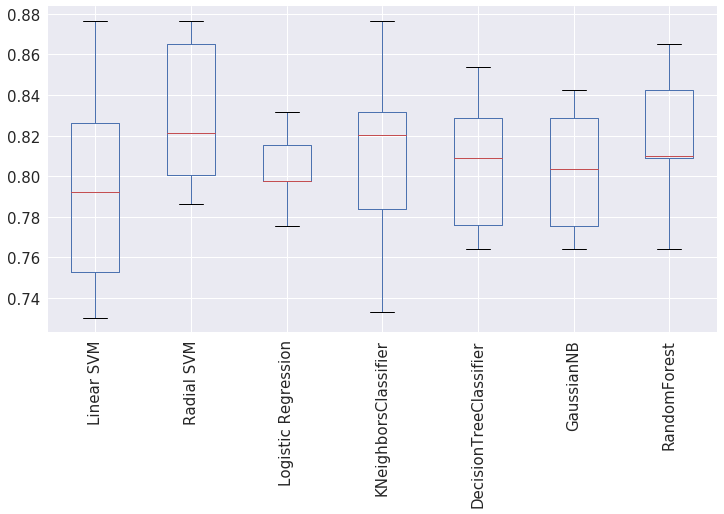

In [81]:
# 수행
Linear_SVM = SVC(kernel='linear')
Radial_SVM = SVC(kernel='rbf')
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=9)
dt_clf = DecisionTreeClassifier()
gaussianNB = GaussianNB()
rf_clf = RandomForestClassifier(n_estimators = 100)   
models = [Linear_SVM, Radial_SVM, lr_clf, knn_clf, dt_clf, gaussianNB, rf_clf]

model_df = get_validation_score(models, X, y, 10)

* 모델별 정확도의 평균점수  시각화

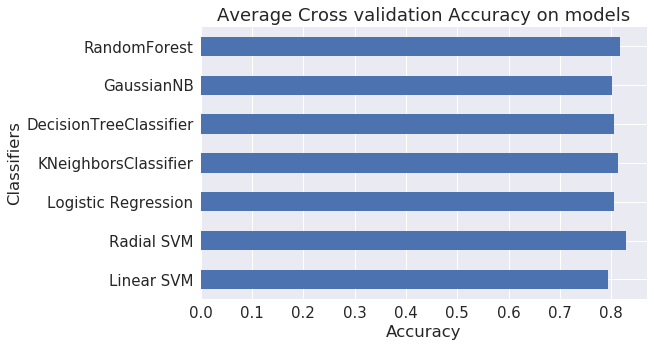

In [82]:
model_df["CV mean"].plot.barh()
plt.title("Average Cross validation Accuracy on models")
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.xlabel("Accuracy")
plt.ylabel("Classifiers")
plt.show()

결정분류기의 정확도는 데이터의 불균형때문에 잘못된 해석이 될수도있다. 

정확도가 가지는 이러한 한계점을 극복하기 위해 여러가진 분류지표가 있는데 ,오차행렬을 이용해 어느 모델이 잘못 예측하고 있는지 확인해 보겠습니다.

## 오차행렬(Confusion Matrix)

* **Read Evaluate Print Loop**

In [83]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_predict

diabetes = load_diabetes()
X_data = diabetes.data
y_data = diabetes.target

lasso = Lasso(alpha=0.05, random_state=156,fit_intercept=True)

# 검증 예측값은 ndarray
prediction  = cross_val_predict(lasso, X_data, y_data, cv = 3, n_jobs=-1, verbose=1)
display(prediction, prediction.shape)

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


array([ 206.62576153,   70.56601581,  180.63116298,  152.64869131,
        125.86594765,   94.17604868,   84.86949437,  145.506867  ,
        170.97798061,  198.41482627,   84.44482015,  122.28833756,
        112.74675181,  162.24873135,  104.1636473 ,  179.72680969,
        198.41021385,  191.7866055 ,  137.12019309,  117.88197961,
        104.27251284,   96.24848416,  116.84964802,  262.15463231,
        157.24226068,  144.14330148,   76.7832107 ,  169.37882605,
        122.9515302 ,  175.82040419,  156.33244726,   62.38478639,
        254.68638085,   92.64933106,   75.7478753 ,   90.55844159,
        197.12296355,  144.15896339,  249.28903686,  141.4794407 ,
        160.4904617 ,   57.59912232,  141.93555628,   77.95005757,
        220.11391856,  130.53902299,  130.4185787 ,   90.80927905,
         92.2650037 ,  182.23710423,  150.24191238,  171.14535878,
        132.36895249,  152.28205144,  141.47845472,   68.51351293,
        192.11618435,   67.17643278,   86.20273902,  143.95733

(442,)

* **모델의 평가지표**

In [84]:
def get_clf_eval(clf, y, y_pred):
    """
    각 모델의 평가지표(accuracy, precision, recall) 계산
    """
    accuracy = np.round(accuracy_score(y, y_pred), 3)
    precision = np.round(precision_score(y, y_pred),3)
    recall    = np.round(recall_score(y, y_pred), 3)
    
    return accuracy, precision, recall

* **오차행렬 시각화**

In [85]:
def visualize_confusion_matrix(models, classifiers):
    """
    모델에 대한 교차검증을 통해 예측치에 대한 오차행렬표 디스플레이하고 , 
    평가지표를 리턴함
    """
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(14, 6))
    evaluation_result = dict()
    
    for i in list(range(3)):
        for j in list(range(3)):
            title = None
            if (i ==0) & (j ==0):
                y_pred = cross_val_predict(models[0], X, y, cv=10) #교차검증 예측값
                sns.heatmap(confusion_matrix(y, y_pred), ax = ax[i, j], annot=True, fmt="2.0f")
                title = "Matrix for {}".format(classifiers[0])
                ax[i,j].set_title(title)
                
                # 실제값과 예측값을 기반으로 모델 평가
                accuracy, precision, recall = get_clf_eval(models[0], y, y_pred)
                evaluation_result[classifiers[0]] = [accuracy, precision, recall]
            elif (i==0) & (j == 1):
                y_pred = cross_val_predict(models[1], X, y, cv=10) #교차검증 예측값
                sns.heatmap(confusion_matrix(y, y_pred), ax = ax[i, j], annot=True, fmt="2.0f")
                title = "Matrix for {}".format(classifiers[1])
                ax[i,j].set_title(title)
                
                # 실제값과 예측값을 기반으로 모델 평가
                accuracy, precision, recall = get_clf_eval(models[1], y, y_pred)
                evaluation_result[classifiers[1]] = [accuracy, precision, recall]
            elif (i==0) & (j == 2):
                y_pred = cross_val_predict(models[2], X, y, cv=10) #교차검증 예측값
                sns.heatmap(confusion_matrix(y, y_pred), ax = ax[i, j], annot=True, fmt="2.0f")
                title = "Matrix for {}".format(classifiers[2])
                ax[i,j].set_title(title)
                
                # 실제값과 예측값을 기반으로 모델 평가
                accuracy, precision, recall = get_clf_eval(models[2], y, y_pred)
                evaluation_result[classifiers[2]] = [accuracy, precision, recall]
            elif (i == 1) & (j==0):
                y_pred = cross_val_predict(models[3], X, y, cv=10)
                sns.heatmap(confusion_matrix(y, y_pred), ax = ax[i,j], annot=True, fmt='2.0f')
                title = 'Matrix for {}'.format(classifiers[3])
                ax[i,j].set_title(title)
                accuracy, precision, recall = get_clf_eval(models[3], y, y_pred)
                evaluation_result[classifiers[3]] = [accuracy, precision, recall]
            elif (i == 1) & (j==1):
                y_pred = cross_val_predict(models[4], X, y, cv=10)
                sns.heatmap(confusion_matrix(y, y_pred), ax = ax[i,j], annot=True, fmt='2.0f')
                title = 'Matrix for {}'.format(classifiers[4])
                accuracy, precision, recall = get_clf_eval(models[4], y, y_pred)
                evaluation_result[classifiers[4]] = [accuracy, precision, recall]
                ax[i,j].set_title(title)
            elif (i == 1) & (j==2):
                y_pred = cross_val_predict(models[5], X, y, cv=10)
                sns.heatmap(confusion_matrix(y, y_pred), ax = ax[i][j], annot=True, fmt='2.0f')
                title = 'Matrix for {}'.format(classifiers[5])
                accuracy, precision, recall = get_clf_eval(models[5], y, y_pred)
                evaluation_result[classifiers[5]] = [accuracy, precision, recall]
                ax[i,j].set_title(title)
            elif (i == 2) & (j==0):
                y_pred = cross_val_predict(models[6], X, y, cv=10)
                sns.heatmap(confusion_matrix(y, y_pred), ax = ax[i,j], annot=True, fmt='2.0f')
                title = 'Matrix for {}'.format(classifiers[6])
                accuracy, precision, recall = get_clf_eval(models[6], y, y_pred)
                evaluation_result[classifiers[6]] = [accuracy, precision, recall]
                ax[i,j].set_title(title)
            else:
                pass
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.close(7)
    plt.close(8)
    plt.show()         
    return evaluation_result             

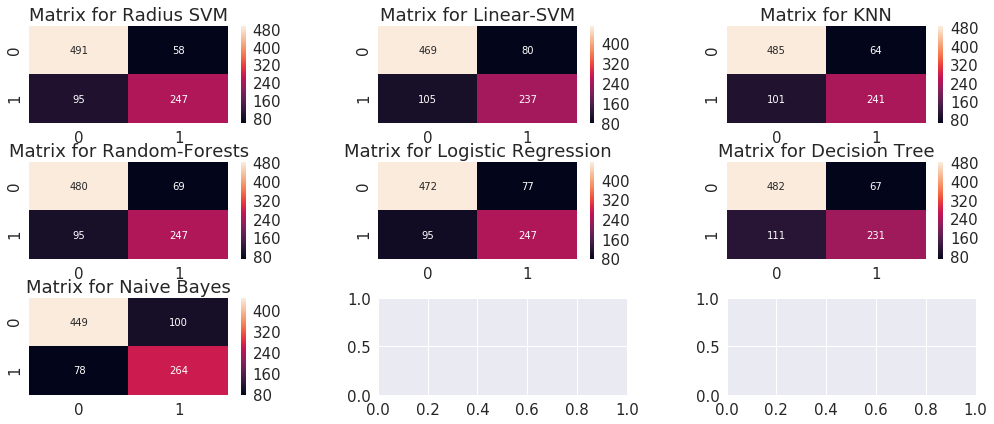

In [86]:
# 오차행렬
rbf_SVM = SVC(kernel='rbf')
linear_SVM  = SVC(kernel='linear')
knn_clf = KNeighborsClassifier(n_neighbors = 9)
rf_clf  = RandomForestClassifier(n_estimators=100)
lr_clf =  LogisticRegression()
dt_clf = DecisionTreeClassifier()
gaussianNB = GaussianNB()

models = [rbf_SVM, linear_SVM, knn_clf, rf_clf, lr_clf, dt_clf, gaussianNB]

classifiers = ['Radius SVM', 'Linear-SVM', 'KNN', 'Random-Forests', 'Logistic Regression', 'Decision Tree', 'Naive Bayes']
evaluation_result = visualize_confusion_matrix(models, classifiers)

In [87]:
for k, v in evaluation_result.items():
    print("{0} model's accuracy score {1:.3f} , precision score {2:.3f}, recall socre {3:.3f}".format(k, v[0], v[1], v[2]))
print("\n")

Radius SVM model's accuracy score 0.828 , precision score 0.810, recall socre 0.722
Linear-SVM model's accuracy score 0.792 , precision score 0.748, recall socre 0.693
KNN model's accuracy score 0.815 , precision score 0.790, recall socre 0.705
Random-Forests model's accuracy score 0.816 , precision score 0.782, recall socre 0.722
Logistic Regression model's accuracy score 0.807 , precision score 0.762, recall socre 0.722
Decision Tree model's accuracy score 0.800 , precision score 0.775, recall socre 0.675
Naive Bayes model's accuracy score 0.800 , precision score 0.725, recall socre 0.772




### 오차행렬 해석

첫번째 rbf-SVM을 가지고 계산:

1)Accuracy :  **(491(for dead) + 247(for survived))  / 891 = 82.8%**

2) Precision : **247(for Survived) / (58 : 사망자를 생존자로 예측  + 247 : 생존자를 생존자로 예측) = 81%**

2)**Errors**-->  58명(사망자를 생존자로 예측), 95명(생존자를 사망자로 예측)

가장 높은 예측 성능을 보이는 것은 rbf-SVM이다. 나이브베이즈 방법은 재현률이 rbf-SVM에 비해 좋다.(생존자를 정확하게 예측하는 확률)

### **하이퍼 파라미터 튜닝**

머신머닝 모델은 블랙박스와 유사합니다. 이 블랙박스를 위한 기본값 파라미터가 있는데, 이 파라미터를 변경을 통해 좀 더 성능이 좋은 모델을 도출할 수 있습니다.

SVM모델에서 C 파라미터, gamma파라미터가 대표적이며, 분류기에 따라서 저마다의 하이퍼 파라미터가 존재합니다.

이번엔 이러한 값들을 변경해봄으로써 모델 성능을 향상시키는 방법을 고찰해보고자 합니다.

#### SVM

* **Read Evaluate Print Loop**

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

C = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

hyper = {"kernel":["rbf", "linear"], "C": C, "gamma": gamma}

svm = SVC()

gd = GridSearchCV(svm, param_grid=hyper, scoring='accuracy', verbose=True, cv = 3)
gd.fit(X, y)

print("Best Parameter : ", gd.best_params_)
print("Best score : ", gd.best_score_)
print("Best estimator : ", gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best Parameter :  {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
Best score :  0.828282828283
Best estimator :  SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   13.5s finished


* **모듈화**

In [89]:
C = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
hyper = {'kernel': ['rbf', 'linear'], 'C': C, 'gamma': gamma}
svm = SVC()
models = [svm]
def hyper_parameter_tuning(models, hyper: dict):
    """
    GridSearchCV를 이용한 하이퍼 파라미터 튜닝
    """
    from sklearn.model_selection import GridSearchCV
    from sklearn.svm import SVC
    
    for model in models:
        gd = GridSearchCV(model, param_grid=hyper, verbose = True, scoring='accuracy',cv = 3)
        gd.fit(X, y)
        
        print("\n")
        display("Best parameter :", gd.best_params_) 
        display("Best Score : ", gd.best_score_)
        display("Best Estimator ", gd.best_estimator_)
        
# hyper parameter tuning
hyper_parameter_tuning(models, hyper)

Fitting 3 folds for each of 240 candidates, totalling 720 fits




[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   13.6s finished


'Best parameter :'

{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}

'Best Score : '

0.82828282828282829

'Best Estimator '

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**결과**

Best parameter : {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}

Best Score :  0.828282828283

Best Estimator  SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Random Forests

In [90]:
n_estimators = list(range(100, 1000, 100))
hyper = {'n_estimators': n_estimators,
        "criterion": ['gini', 'entropy'],
         "max_depth": [3, 4, 5, 7, 10],
         "min_samples_split": [2, 3]         
        }

rt_clf = RandomForestClassifier()

models = [rf_clf]
hyper_parameter_tuning(models, hyper)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  6.9min finished


'Best parameter :'

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_split': 3,
 'n_estimators': 400}

'Best Score : '

0.83501683501683499

'Best Estimator '

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**하이퍼 파라미터 튜닝 결과**

'Best parameter :'
{'criterion': 'gini',

 'max_depth': 4,

'min_samples_split': 2,

'n_estimators': 200
}

**Best Score : 0.8338945005611672**

**Best Estimator : RandomForestClassifier(max_depth=4, n_estimators=200)**


 **2nd test**
 
'Best parameter :'{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 100}

 Best Score : 0.83501683501683499
 
 Best Estimator : 
 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',

            max_depth=4, max_features='auto', max_leaf_nodes=None,
            
            min_impurity_decrease=0.0, min_impurity_split=None,
            
            min_samples_leaf=1, min_samples_split=3,
            
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            
            oob_score=False, random_state=None, verbose=0,
            
            warm_start=False)

# Ensembling

앙상블이 ML모델의 성능 혹은 정확도를 높이기 위한 좋은 방법이다. 

단순히 표현하면, 하나의 예측 성능이 좋은 모델을 만들기 위해 다양한 분류기의 조합을 이용하는 것이다.

예를 든다면, 하나의 제품을 출시하기에 앞서 해당 제품을 구매할 의향이 있는 다양한 분야의 사람들에게 미리 준비된 다양한 인자들을 바탕으로 의견을 구하고 , 이 의견을 취합에 제품 출시시 반영한다. 

그렇다면 해당 제품은 더욱 안정성, 품질을 보장하는 되는 것이다. 

이런 측면에서 보면,앙상블 기법도 이와 유사한 과정을 거친다.

1)Voting Classifier

2)Bagging

3)Boosting.

**Read Evaluate Print Loop**
1. VotingClassifier
2. BaggingClassifier

In [91]:
# 1. VotingClassifier
from sklearn.ensemble import VotingClassifier

knn = KNeighborsClassifier(n_neighbors=10)

en_clf = VotingClassifier([('KNeighborsClassifier', knn)], voting= "soft")

en_clf.fit(X_train, y_train)

# Return the mean accuracy on the given test data and labels.
# 0.832089552238806
en_clf.score(X_test, y_test)   

0.83208955223880599

In [92]:
# 2. BaggingClassifier
from sklearn.ensemble import BaggingClassifier

knn = KNeighborsClassifier(n_neighbors=10)

en_clf = BaggingClassifier(base_estimator = knn, random_state = 0, n_estimators = 900)

en_clf.fit(X_train, y_train)

prediction = en_clf.predict(X_test)
display(prediction, prediction.shape)

# 정확도
print("The accuracy for {0} is {1:.3f}".format(knn.__class__.__name__, accuracy_score(y_test, prediction)))

# 교차검증 스코어
cross_val_scores = cross_val_score(en_clf, X, y, scoring='accuracy', cv = 10, n_jobs=-1, verbose=True)
print("{}모델의 교차검증 점수 : {} 이고 평균값은 {}과 같다.".format(knn.__class__.__name__, cross_val_scores, np.mean(cross_val_scores)))

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1])

(268,)

The accuracy for KNeighborsClassifier is 0.854
KNeighborsClassifier모델의 교차검증 점수 : [ 0.73333333  0.83333333  0.76404494  0.83146067  0.84269663  0.84269663
  0.85393258  0.76404494  0.84269663  0.80681818] 이고 평균값은 0.8115057882192713과 같다.


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   18.4s finished


**모듈화**

In [93]:
def get_ensemble_score(estimator):
    """
    앙상블로 결정된 분류기를 인자로 받아 학습데이터와 레이블 데이터로 학습 후 
    주어진 테스트데이터에 대한 평균 정확도를 리턴
    피처데이터와 레이블 기반으로 교차검증 점수 계산    
    """
    name = estimator.__class__.__name__
    estimator.fit(X_train, y_train)
    
    if name =="VotingClassifier": # VotingClassifier
        display("Voting Score : ", estimator.score(X_test, y_test))
        display("ClassifierName", estimator.estimators)
    elif name=="BaggingClassifier":   # BaggingClassifier
        display("ClassifierName", estimator.base_estimator.__class__.__name__)
        prediction = estimator.predict(X_test)
        print("The accuracy for {0} is {1:.3f}".format(name, accuracy_score(y_test, prediction)))
    else:  #Boosting계열
        display("ClassifierName", estimator.__class__.__name__)
    cross_score= cross_val_score(estimator, X, y, scoring='accuracy', cv = 10, n_jobs=-1, verbose=True)    
    display("Cross Validated Score for {0} : {1:.3f}".format(name, cross_score.mean()))

## Voting Classifier

여러개의 결정분류기(서로 다른 알고리즘을 가진 모델)가 예측한 결과치를 바탕으로 평균값을 도출하는 방법

In [94]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

knn  = KNeighborsClassifier(n_neighbors=10)

# probabily=True예측치를 확률값으로 리턴
rbf = SVC(probability=True, C=0.5, gamma=0.1, kernel='rbf')

lr = LogisticRegression(C=0.05)
rf = RandomForestClassifier(n_estimators=500, random_state=0)
dt = DecisionTreeClassifier(random_state = 0)
nb = GaussianNB()
#svm = SVC(kernel='linear', probability=True)

classifiers = [knn,rbf, lr, rf, dt, nb]

# 리스트안에 튜플로 구성해야 하므로 중복된 값이 있으면 안됨.
# [('DecisionTreeClassifier', dt), ()...('SVC', svm)] 
estimators = [(cls.__class__.__name__, cls) for cls in classifiers]

display(estimators)

ensemble_clf = VotingClassifier(estimators, voting="soft", n_jobs=-1)
get_ensemble_score(ensemble_clf)

[('KNeighborsClassifier',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=10, p=2,
             weights='uniform')),
 ('SVC', SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)),
 ('LogisticRegression',
  LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False)),
 ('RandomForestClassifier',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_s

'Voting Score : '

0.82462686567164178

'ClassifierName'

[('KNeighborsClassifier',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=10, p=2,
             weights='uniform')),
 ('SVC', SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)),
 ('LogisticRegression',
  LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False)),
 ('RandomForestClassifier',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_s

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.8s finished


'Cross Validated Score for VotingClassifier : 0.818'

## Bagging

유사한 여러개의 분류기가 한 데이터셋을 바탕으로 학습하고하는 데이터셋을 각각 샘플링 비율을 달리하여 샘플링한 데이터셋을 가지고 학습 및 예측하여 예측 결과값의 평균값으로 최종 예측 결과값을 취하는 방법

#### Bagged KNN

모델간의 예측 결과값의 변동성이 큰 경우,배깅이 가장 잘 동작합니다.(결정트리 혹은 RandomForest기법이 한 예임

Decision Tree 혹은 Random Forests가 배깅의 예이며, KNN최근접 이웃기법에 **n_neighbors**를 가능하다면 작은 값으로 적용

In [95]:
from sklearn.ensemble import BaggingClassifier

# base_estimator의 기본값은 DecisionTree
# n_neighbors의 갯수가 많다고 해서 교차검증 점수가 좋아지진 않음
model = BaggingClassifier(KNeighborsClassifier(n_neighbors=3), random_state=0,n_estimators=700)
get_ensemble_score(model)

'ClassifierName'

'KNeighborsClassifier'

The accuracy for BaggingClassifier is 0.836


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.9s finished


'Cross Validated Score for BaggingClassifier : 0.815'

#### Bagged DecisionTree


In [96]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
get_ensemble_score(model)

'ClassifierName'

'DecisionTreeClassifier'

The accuracy for BaggingClassifier is 0.825


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s finished


'Cross Validated Score for BaggingClassifier : 0.820'

## Boosting

부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식

성능은 좋지만, 수행시간이 오래걸린다. 왜냐하면 약한 학습기를 순차적으로 학습하는데 ,데이터를 읽고 데이터에 대해서 잘못 예측한 데이터에 대해서 가중치를 부여하고 그 다음에 다른 학습기가 또 그 데이터를 학습을 진행한다. 

1. **AdaBoost(Adaptive Boosting)**
* AdaBoost의 Default estimator는 DecisionTree이지만, 변경이 가능
2. **Stochastic Gradient Boosting**
* 약한 학습기로서 DecisionTree이다.
3. **XGBoost**

**AdaBoost**

In [97]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
get_ensemble_score(ada)

'ClassifierName'

'AdaBoostClassifier'

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.8s finished


'Cross Validated Score for AdaBoostClassifier : 0.825'

**Stochastic Gradient Boosting**

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)

#수행
get_ensemble_score(grad)

'ClassifierName'

'GradientBoostingClassifier'

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.5s finished


'Cross Validated Score for GradientBoostingClassifier : 0.818'

**XGBoost**

In [99]:
import xgboost as xgb
xgboost = xgb.XGBClassifier(n_estimators=900, learning_rate=0.1)
get_ensemble_score(xgboost)

'ClassifierName'

'XGBClassifier'

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished


'Cross Validated Score for XGBClassifier : 0.810'

가장 높은 정확도를 갖는 AdaBoost를 가지고,하이퍼 파라미터 튜닝을 진행

#### Hyper-Parameter Tuning for AdaBoost

In [100]:
n_estimators = list(range(100, 1100, 100))
learning_rate = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper ={"n_estimators": n_estimators, "learning_rate": learning_rate}

models = [AdaBoostClassifier()]
hyper_parameter_tuning(models, hyper)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  5.6min finished


'Best parameter :'

{'learning_rate': 0.05, 'n_estimators': 200}

'Best Score : '

0.83164983164983164

'Best Estimator '

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None)

**Best parameter :{'learning_rate': 0.05, 'n_estimators': 200}**

**Best Score : 0.83164983164983164**

**Best Estimator : AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,learning_rate=0.05, n_estimators=200, random_state=None)**

### Confusion Matrix for the Best Model

In [101]:
def show_heatmapAdaBoost(estimator, X, y):
    """
    실제 타겟값과 예측값을 오차행렬로 표시
    """
    # 교차검증을 통한 피처값과 레이블 값을 통한 예측치 계산
    result = cross_val_predict(estimator, X, y, cv = 10)  
    
    # 실제 레이블값과 예측값을 이용해 오차행렬 생성
    sns.heatmap(confusion_matrix(y, result), cmap="winter_r", annot=True, fmt='2.0f')
    return result
def main(estimator, X, y):
    """
    레이블 데이터셋과 타겟 데이터셋을 받아 히트맵과 평가지표를 리턴
    """    
    result = show_heatmapAdaBoost(ada, X, y)
    evaluation_result = dict()
    accuracy, precision, recall = get_clf_eval(ada, y, result)
    evaluation_result['AdaBoost'] = [accuracy, precision, recall]
    
    for k, v in evaluation_result.items():
        print("Evaluation result for {0}, Accuracy : {1:.3f}, Precision : {2:.3f}, Recall : {3:.3f}".format(k, v[0], v[1], v[2]))

Evaluation result for AdaBoost, Accuracy : 0.832, Precision : 0.814, Recall : 0.728


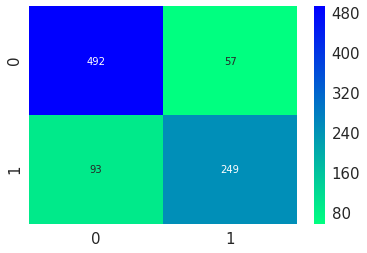

In [102]:
ada = AdaBoostClassifier(n_estimators = 200, learning_rate=0.05, random_state=0)
main(ada, X, y)

**True Negative와 True Positive값이 증가했으며,상대적으로 False Negative, False Positive가 줄었다.**

1.생존자와 사망자를 정확하게 찾아내는것이 정확도 , 정밀도가 높아짐.

2.생존했는데 사망했다고 예측하는 것(False negative)가 SVM모델보다 줄었고, 사망했는데 생존했다고 예측한 것(Falise Positive)도 줄었음

3.결과적으로 정확도와 정밀도가 높아짐.

## Feature Importance

**Read Evaluate Print Loop**

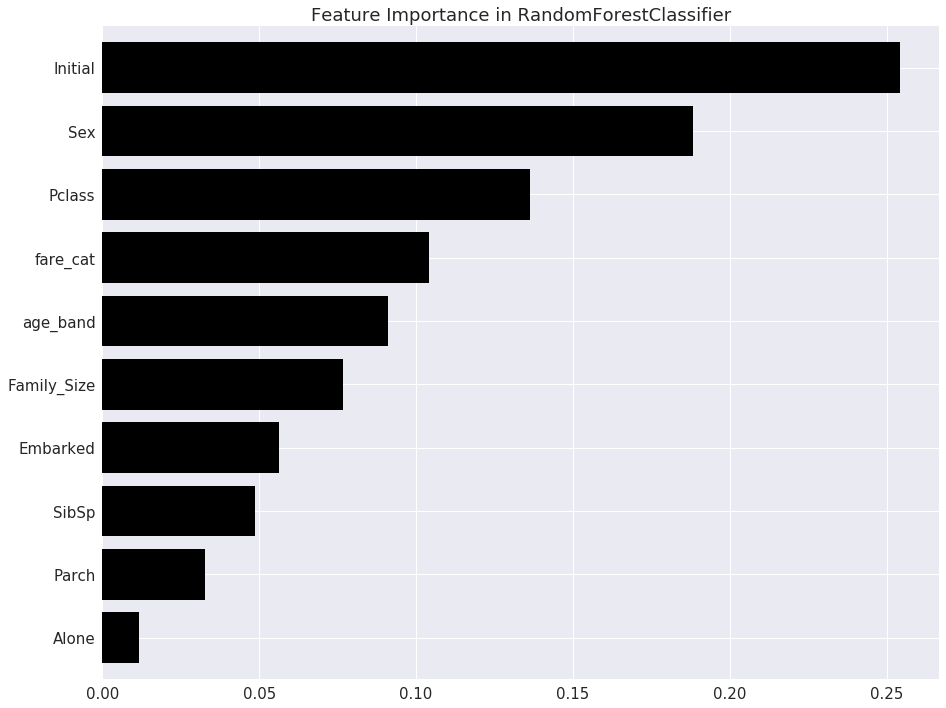

In [103]:
rf_clf = RandomForestClassifier(n_estimators=500, random_state=0)

# 피처와 레이블 데이터 
rf_clf.fit(X, y)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))
feature_importances = pd.Series(rf_clf.feature_importances_, index = X.columns)
feature_importances = feature_importances.sort_values(ascending=True)
feature_importances.plot.barh(width=0.8, cmap=cmaps[np.random.randint(1, 178)])
ax.set_title("Feature Importance in {}".format(rf_clf.__class__.__name__))

plt.show()

In [104]:
def plot_feature_importance(estimators, X, y):
    """
    분류기를 학습 및 레이블 데이터 학습 후 Feature Importance 시각화 
    """
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
    for i in range(2):
        for j in range(2):
            if (i == 0) & (j ==0):
                estimators[0].fit(X, y)
                feature_importance = pd.Series(estimators[0].feature_importances_, X.columns)
                feature_importance = feature_importance.sort_values(ascending=True)
                feature_importance.plot.barh(width=0.8, ax=ax[i, j], cmap=cmaps[np.random.randint(1, 178)])
                ax[i, j].set_title("Feature Importance in {}".format(estimators[0].__class__.__name__))
            elif (i==0) & (j ==1):
                estimators[1].fit(X, y)
                feature_importance = pd.Series(estimators[1].feature_importances_, X.columns)
                feature_importance = feature_importance.sort_values(ascending=True)
                feature_importance.plot.barh(width=0.8, ax=ax[i, j], cmap=cmaps[np.random.randint(1, 178)])
                ax[i, j].set_title("Feature Importance in {}".format(estimators[1].__class__.__name__))
            elif (i==1) & (j ==0):
                estimators[2].fit(X, y)
                feature_importance = pd.Series(estimators[2].feature_importances_, X.columns)
                feature_importance = feature_importance.sort_values(ascending=True)
                feature_importance.plot.barh(width=0.8, ax=ax[i, j], cmap=cmaps[np.random.randint(1, 178)])
                ax[i, j].set_title("Feature Importance in {}".format(estimators[2].__class__.__name__))
            elif (i==1) & (j ==1):
                estimators[3].fit(X, y)
                feature_importance = pd.Series(estimators[3].feature_importances_, X.columns)
                feature_importance = feature_importance.sort_values(ascending=True)
                feature_importance.plot.barh(width=0.8, ax=ax[i, j], cmap=cmaps[np.random.randint(1, 178)])
                ax[i, j].set_title("Feature Importance in {}".format(estimators[3].__class__.__name__))
    plt.show()        

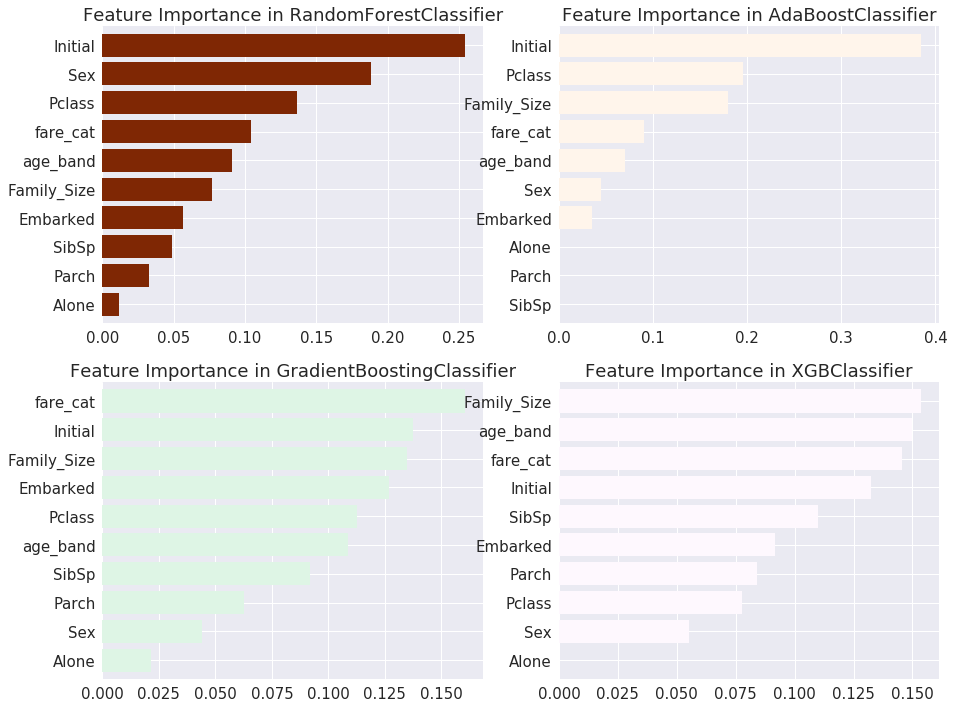

In [105]:
classfiers = ['RandomForest', 'AdaBoost', 'GradientBoost', 'XGB']
rf_clf = RandomForestClassifier(n_estimators=500, random_state=0)
ada_clf = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
gd_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
xgb_clf = xgb.XGBClassifier(n_estimators=900, learning_rate=0.1, random_state=0)
estimators = [rf_clf, ada_clf, gd_clf, xgb_clf]

plot_feature_importance(estimators, X, y)

우리는 랜덤포레스트,AdaBoost와 같은 다양한 분류기에 대한 중요 피처들을 알 수 있다.

#### Observations:

1)가장 중요한 피처 -  Initial,Fare_cat,Pclass,Family_Size순.

2)성별 피처는 더 이상 중요해보이지가 않습니다. Sex와 Pclass조합해본 것을 보면 확실히 구별되는 피처의 조합으로 보입니다.

성별은 RandomForest에서는 중요한 피처로 간주됩니다.

하지만, Initial피처가 많은 분류기에서 맨 상단에 위치함을 볼 수 있습니다.

히트맵에서 본것 처럼 Sex와 Initial은 양의 상관관계를 갖고있습니다. 

그래서 우리는 이 두 피처를 Sex로 간주해도 무방하지 않을까요?

3)유사하게 Pclass와 Fare_cat도 승객의 상태와 관련되어 있고, Alone, Parch 그리고 SibSp는 Family_Size와 연관되어 있습니다.

### Reference

1) For R:[Divide and Conquer by Oscar Takeshita](https://www.kaggle.com/pliptor/divide-and-conquer-0-82297/notebook)

2)For Python:[Pytanic by Heads and Tails](https://www.kaggle.com/headsortails/pytanic)

3)For Python:[Introduction to Ensembling/Stacking by Anisotropic](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python)